## A Comparative study of SVM and MLP using Higgs Boson Dataset

Original Source: http://opendata.cern.ch/record/328
, Below dataset picked: https://www.kaggle.com/datasets/knight079/higgsb

In [20]:
# import numpy as np # Importing the necessary libraries for data preprocessing
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# df = pd.read_csv('training.csv') # loading the data
# df

In [21]:
# Higgs_Boson_Dataset = df.sample(frac = 0.15)

In [22]:
# Higgs_Boson_Dataset

In [23]:
# import pandas
# from IPython.display import FileLink
# import os
# Higgs_Boson_Dataset.to_csv('Higgs_Boson_Dataset.csv', index=False)

#### The original dataset had 250,000 rows in the training csv file and 50,000 rows in the test csv file. This dataset is quite large for this coursework. So, I have sampled the training data for this coursework. I have sampled 15% of the training data i.e. 37,500 instances for this coursework. The Higgs_Boson_Dataset.csv will be used to train and test the models of this cousework. 

Loading the data

In [1]:
import numpy as np # Importing the necessary libraries for data preprocessing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
Higgsdf = pd.read_csv('Higgs_Boson_Dataset.csv') # loading the data
Higgsdf

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,325984,104.853,43.324,71.877,67.268,-999.000,-999.000,-999.000,2.140,1.068,...,1,67.329,1.131,2.726,-999.000,-999.000,-999.000,67.329,1.681611,b
1,144417,-999.000,68.679,47.349,5.789,-999.000,-999.000,-999.000,1.581,5.789,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,4.237851,b
2,284399,106.499,8.866,45.836,209.535,5.072,1316.903,-6.384,1.282,2.502,...,2,151.390,2.317,-1.710,72.484,-2.755,-2.411,223.874,0.001503,s
3,313311,84.420,60.814,80.690,0.923,-999.000,-999.000,-999.000,2.815,0.923,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,2.635318,b
4,242552,98.917,29.801,65.578,26.724,-999.000,-999.000,-999.000,2.934,13.027,...,1,35.505,-1.509,-2.659,-999.000,-999.000,-999.000,35.505,0.001503,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,321128,105.649,85.204,64.273,7.986,-999.000,-999.000,-999.000,2.718,7.986,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,4.874286,b
37496,314792,117.533,22.123,57.841,111.512,-999.000,-999.000,-999.000,2.489,4.537,...,1,113.965,0.114,-2.322,-999.000,-999.000,-999.000,113.965,0.018636,s
37497,166117,113.100,35.682,87.131,75.228,-999.000,-999.000,-999.000,2.350,3.376,...,1,72.160,1.054,-0.130,-999.000,-999.000,-999.000,72.160,0.001503,s
37498,170507,129.970,97.128,67.214,89.704,1.968,138.808,0.932,2.771,52.461,...,2,53.024,-2.363,3.110,50.368,-0.395,1.710,103.392,0.073899,b


In [2]:
Higgsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   EventId                      37500 non-null  int64  
 1   DER_mass_MMC                 37500 non-null  float64
 2   DER_mass_transverse_met_lep  37500 non-null  float64
 3   DER_mass_vis                 37500 non-null  float64
 4   DER_pt_h                     37500 non-null  float64
 5   DER_deltaeta_jet_jet         37500 non-null  float64
 6   DER_mass_jet_jet             37500 non-null  float64
 7   DER_prodeta_jet_jet          37500 non-null  float64
 8   DER_deltar_tau_lep           37500 non-null  float64
 9   DER_pt_tot                   37500 non-null  float64
 10  DER_sum_pt                   37500 non-null  float64
 11  DER_pt_ratio_lep_tau         37500 non-null  float64
 12  DER_met_phi_centrality       37500 non-null  float64
 13  DER_lep_eta_cent

In [3]:
Higgsdf['Label'] = Higgsdf['Label'].map({'s': 1, 'b': 0}) # Labeling the class 's' as 1 and 'b' as 0.
Higgsdf

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,325984,104.853,43.324,71.877,67.268,-999.000,-999.000,-999.000,2.140,1.068,...,1,67.329,1.131,2.726,-999.000,-999.000,-999.000,67.329,1.681611,0
1,144417,-999.000,68.679,47.349,5.789,-999.000,-999.000,-999.000,1.581,5.789,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,4.237851,0
2,284399,106.499,8.866,45.836,209.535,5.072,1316.903,-6.384,1.282,2.502,...,2,151.390,2.317,-1.710,72.484,-2.755,-2.411,223.874,0.001503,1
3,313311,84.420,60.814,80.690,0.923,-999.000,-999.000,-999.000,2.815,0.923,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,2.635318,0
4,242552,98.917,29.801,65.578,26.724,-999.000,-999.000,-999.000,2.934,13.027,...,1,35.505,-1.509,-2.659,-999.000,-999.000,-999.000,35.505,0.001503,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,321128,105.649,85.204,64.273,7.986,-999.000,-999.000,-999.000,2.718,7.986,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,4.874286,0
37496,314792,117.533,22.123,57.841,111.512,-999.000,-999.000,-999.000,2.489,4.537,...,1,113.965,0.114,-2.322,-999.000,-999.000,-999.000,113.965,0.018636,1
37497,166117,113.100,35.682,87.131,75.228,-999.000,-999.000,-999.000,2.350,3.376,...,1,72.160,1.054,-0.130,-999.000,-999.000,-999.000,72.160,0.001503,1
37498,170507,129.970,97.128,67.214,89.704,1.968,138.808,0.932,2.771,52.461,...,2,53.024,-2.363,3.110,50.368,-0.395,1.710,103.392,0.073899,0


In [4]:
Higgsdf = Higgsdf.drop(['EventId', 'Weight'], axis=1)
Higgsdf

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,104.853,43.324,71.877,67.268,-999.000,-999.000,-999.000,2.140,1.068,151.831,...,157.453,1,67.329,1.131,2.726,-999.000,-999.000,-999.000,67.329,0
1,-999.000,68.679,47.349,5.789,-999.000,-999.000,-999.000,1.581,5.789,65.614,...,115.186,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0
2,106.499,8.866,45.836,209.535,5.072,1316.903,-6.384,1.282,2.502,297.354,...,335.707,2,151.390,2.317,-1.710,72.484,-2.755,-2.411,223.874,1
3,84.420,60.814,80.690,0.923,-999.000,-999.000,-999.000,2.815,0.923,55.299,...,69.063,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,0
4,98.917,29.801,65.578,26.724,-999.000,-999.000,-999.000,2.934,13.027,100.501,...,261.492,1,35.505,-1.509,-2.659,-999.000,-999.000,-999.000,35.505,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,105.649,85.204,64.273,7.986,-999.000,-999.000,-999.000,2.718,7.986,71.049,...,62.173,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0
37496,117.533,22.123,57.841,111.512,-999.000,-999.000,-999.000,2.489,4.537,174.398,...,232.123,1,113.965,0.114,-2.322,-999.000,-999.000,-999.000,113.965,1
37497,113.100,35.682,87.131,75.228,-999.000,-999.000,-999.000,2.350,3.376,163.267,...,159.962,1,72.160,1.054,-0.130,-999.000,-999.000,-999.000,72.160,1
37498,129.970,97.128,67.214,89.704,1.968,138.808,0.932,2.771,52.461,172.320,...,317.256,2,53.024,-2.363,3.110,50.368,-0.395,1.710,103.392,0


In [5]:
Higgsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DER_mass_MMC                 37500 non-null  float64
 1   DER_mass_transverse_met_lep  37500 non-null  float64
 2   DER_mass_vis                 37500 non-null  float64
 3   DER_pt_h                     37500 non-null  float64
 4   DER_deltaeta_jet_jet         37500 non-null  float64
 5   DER_mass_jet_jet             37500 non-null  float64
 6   DER_prodeta_jet_jet          37500 non-null  float64
 7   DER_deltar_tau_lep           37500 non-null  float64
 8   DER_pt_tot                   37500 non-null  float64
 9   DER_sum_pt                   37500 non-null  float64
 10  DER_pt_ratio_lep_tau         37500 non-null  float64
 11  DER_met_phi_centrality       37500 non-null  float64
 12  DER_lep_eta_centrality       37500 non-null  float64
 13  PRI_tau_pt      

In [6]:
higgs_df1 = Higgsdf.drop(Higgsdf[Higgsdf['Label'] != 0].index)
higgs_df1 # Subsetting the dataframe of class g.

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
0,104.853,43.324,71.877,67.268,-999.000,-999.000,-999.000,2.140,1.068,151.831,...,157.453,1,67.329,1.131,2.726,-999.000,-999.000,-999.00,67.329,0
1,-999.000,68.679,47.349,5.789,-999.000,-999.000,-999.000,1.581,5.789,65.614,...,115.186,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.00,-0.000,0
3,84.420,60.814,80.690,0.923,-999.000,-999.000,-999.000,2.815,0.923,55.299,...,69.063,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.00,0.000,0
5,143.212,79.576,112.670,1.778,-999.000,-999.000,-999.000,3.412,1.778,67.760,...,58.255,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.00,0.000,0
6,-999.000,116.952,117.433,29.733,-999.000,-999.000,-999.000,2.028,29.733,124.870,...,346.333,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.00,-0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37492,-999.000,86.453,64.644,21.686,-999.000,-999.000,-999.000,2.552,21.686,69.078,...,58.387,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.00,0.000,0
37493,120.056,28.146,85.956,49.521,-999.000,-999.000,-999.000,2.786,1.543,124.781,...,153.859,1,48.408,-1.760,2.294,-999.000,-999.000,-999.00,48.408,0
37495,105.649,85.204,64.273,7.986,-999.000,-999.000,-999.000,2.718,7.986,71.049,...,62.173,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.00,-0.000,0
37498,129.970,97.128,67.214,89.704,1.968,138.808,0.932,2.771,52.461,172.320,...,317.256,2,53.024,-2.363,3.110,50.368,-0.395,1.71,103.392,0


In [7]:
higgs_df0 = Higgsdf.drop(Higgsdf[Higgsdf['Label'] != 1].index)
higgs_df0 # Subsetting the dataframe of class g.

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Label
2,106.499,8.866,45.836,209.535,5.072,1316.903,-6.384,1.282,2.502,297.354,...,335.707,2,151.390,2.317,-1.710,72.484,-2.755,-2.411,223.874,1
4,98.917,29.801,65.578,26.724,-999.000,-999.000,-999.000,2.934,13.027,100.501,...,261.492,1,35.505,-1.509,-2.659,-999.000,-999.000,-999.000,35.505,1
7,107.246,40.512,41.134,178.009,4.277,991.003,-4.481,1.202,42.836,349.537,...,380.382,3,135.820,-2.444,-0.747,99.514,1.833,-2.587,278.980,1
10,148.078,2.331,115.838,152.026,4.305,684.333,-4.633,1.814,8.507,300.928,...,276.293,2,105.349,-2.185,-2.791,60.768,2.120,-1.773,166.117,1
13,-999.000,73.699,91.725,3.026,-999.000,-999.000,-999.000,2.389,74.096,155.467,...,106.115,1,72.141,-2.381,-1.440,-999.000,-999.000,-999.000,72.141,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37482,129.773,13.121,92.355,52.933,0.400,113.824,0.794,2.790,2.019,218.684,...,246.225,2,69.106,-1.113,2.484,53.194,-0.713,-1.553,122.300,1
37485,111.506,124.992,101.978,96.119,0.816,219.934,0.693,1.497,27.221,394.358,...,489.710,3,122.372,1.335,1.131,90.389,0.519,-1.346,255.159,1
37494,122.345,29.645,72.268,68.050,2.304,111.747,2.181,2.377,0.379,149.006,...,122.703,2,42.267,-0.721,2.460,32.543,-3.025,-2.970,74.810,1
37496,117.533,22.123,57.841,111.512,-999.000,-999.000,-999.000,2.489,4.537,174.398,...,232.123,1,113.965,0.114,-2.322,-999.000,-999.000,-999.000,113.965,1


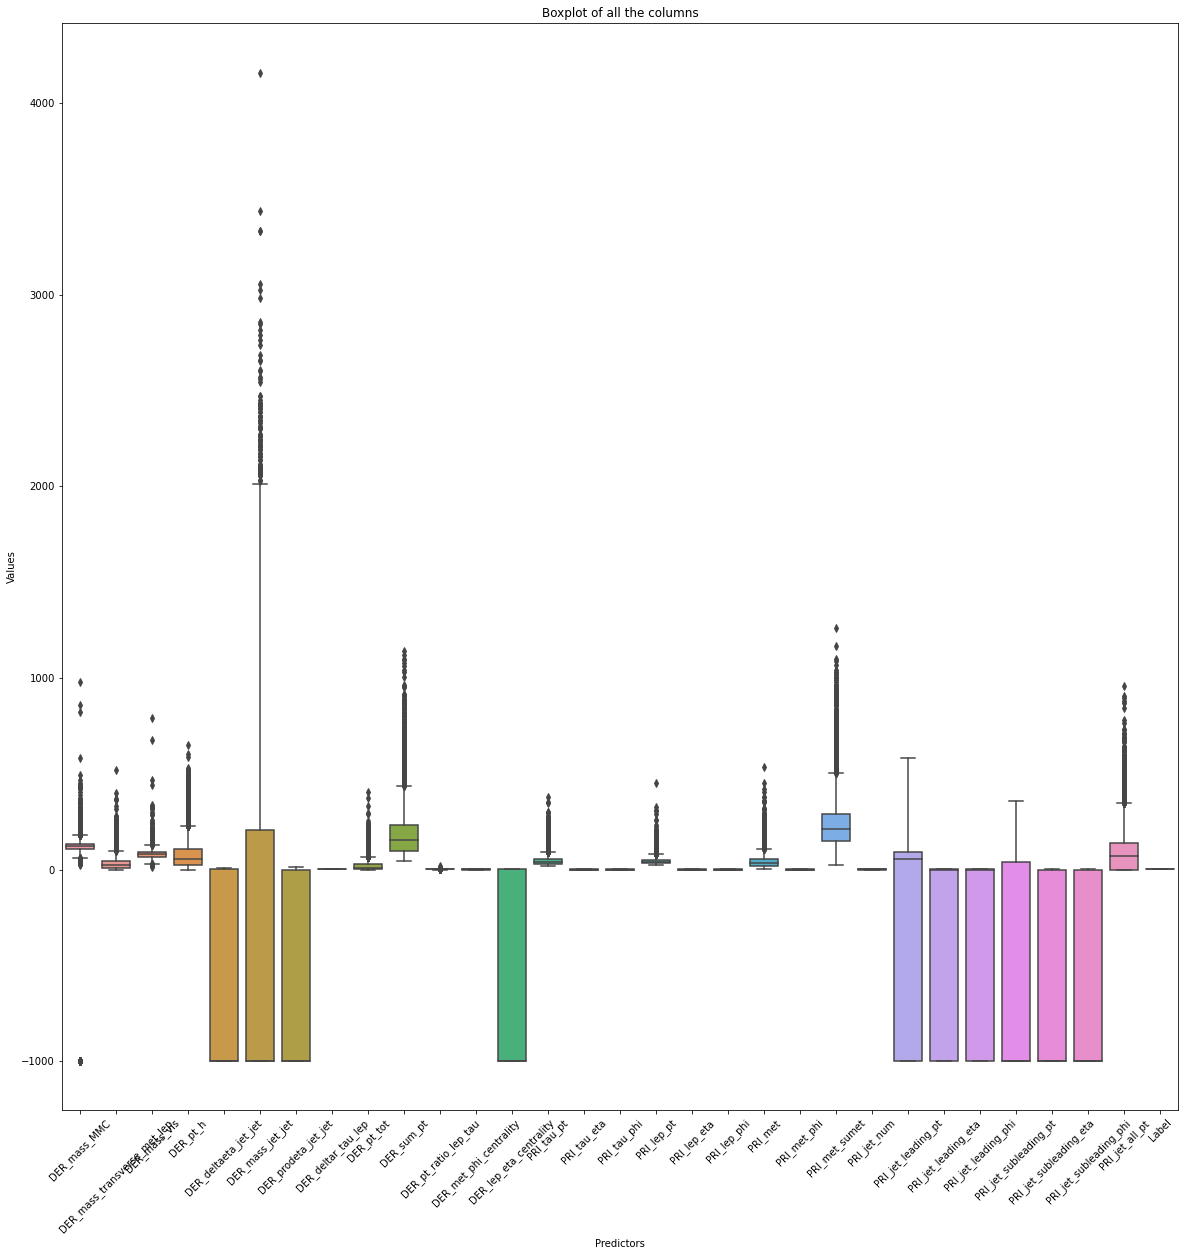

In [8]:
fig, ax = plt.subplots(figsize = (20,20)) # Observing the outliers of the class g.
chart = sns.boxplot(data= higgs_df0)
plt.title("Boxplot of all the columns")
plt.xticks(rotation=45)
plt.xlabel("Predictors")
plt.ylabel("Values")
plt.show()

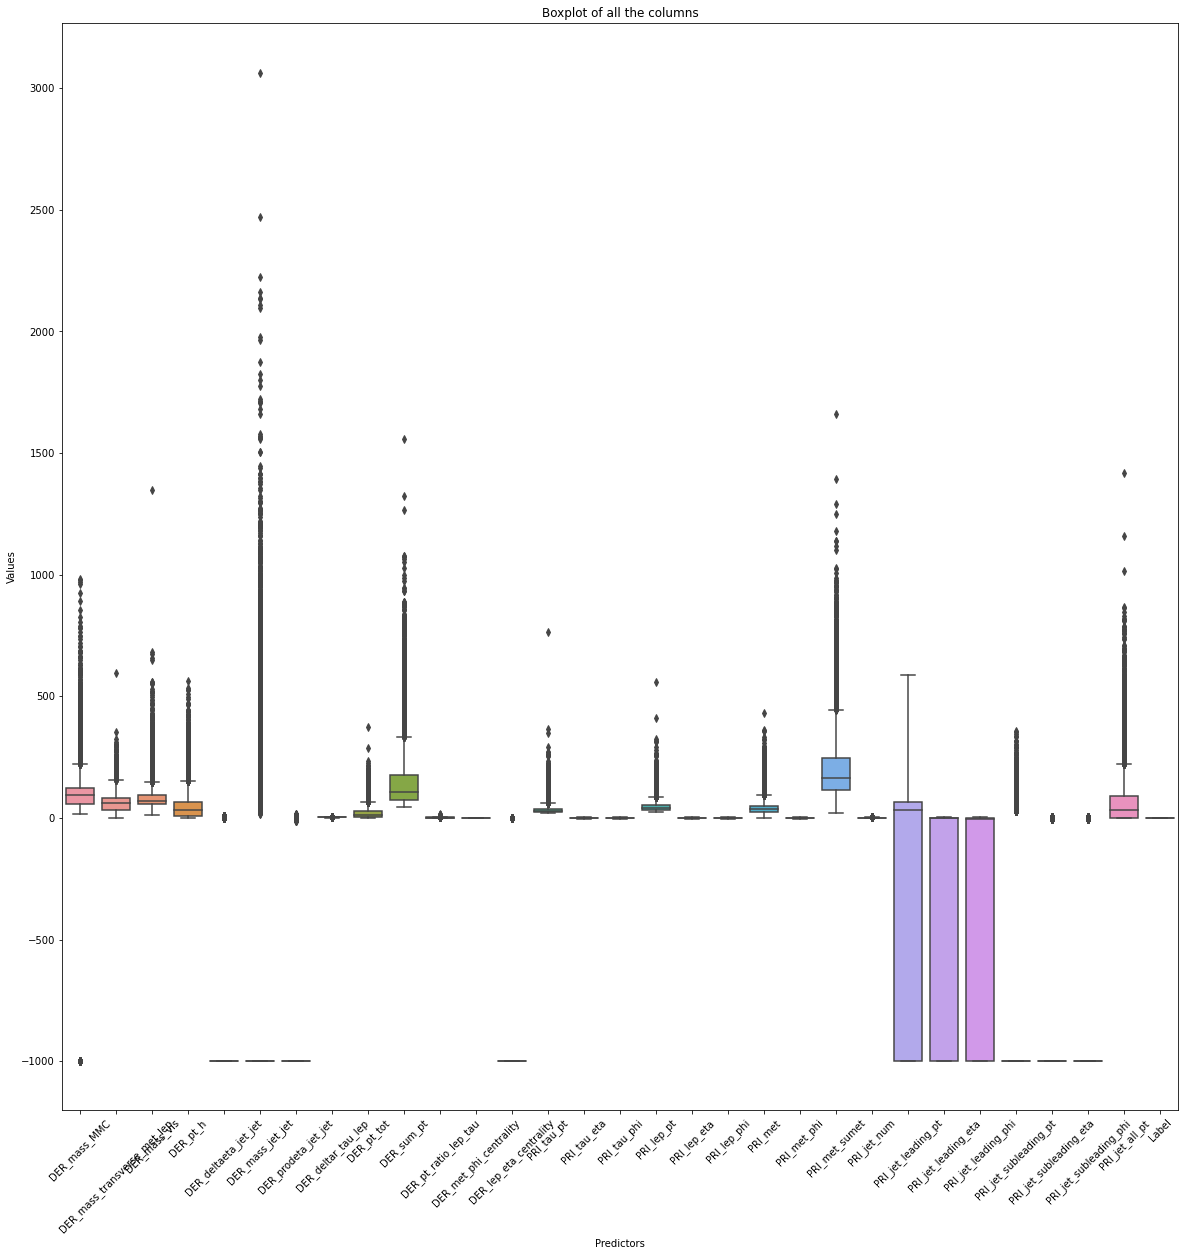

In [9]:
fig, ax = plt.subplots(figsize = (20,20)) # Observing the outliers of the class g.
chart = sns.boxplot(data= higgs_df1)
plt.title("Boxplot of all the columns")
plt.xticks(rotation=45)
plt.xlabel("Predictors")
plt.ylabel("Values")
plt.show()

#### Seperating the features and target values

In [10]:
X = Higgsdf.drop(['Label'], axis=1)
y = Higgsdf['Label']

#### Handling missing values

In [11]:
X = X.replace(-999.000, np.nan) # replacing 
X

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,104.853,43.324,71.877,67.268,NaN,NaN,NaN,2.140,1.068,151.831,...,-0.012,157.453,1,67.329,1.131,2.726,NaN,NaN,NaN,67.329
1,NaN,68.679,47.349,5.789,NaN,NaN,NaN,1.581,5.789,65.614,...,-2.249,115.186,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000
2,106.499,8.866,45.836,209.535,5.072,1316.903,-6.384,1.282,2.502,297.354,...,1.132,335.707,2,151.390,2.317,-1.710,72.484,-2.755,-2.411,223.874
3,84.420,60.814,80.690,0.923,NaN,NaN,NaN,2.815,0.923,55.299,...,1.073,69.063,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
4,98.917,29.801,65.578,26.724,NaN,NaN,NaN,2.934,13.027,100.501,...,0.259,261.492,1,35.505,-1.509,-2.659,NaN,NaN,NaN,35.505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,105.649,85.204,64.273,7.986,NaN,NaN,NaN,2.718,7.986,71.049,...,-1.165,62.173,0,NaN,NaN,NaN,NaN,NaN,NaN,-0.000
37496,117.533,22.123,57.841,111.512,NaN,NaN,NaN,2.489,4.537,174.398,...,0.830,232.123,1,113.965,0.114,-2.322,NaN,NaN,NaN,113.965
37497,113.100,35.682,87.131,75.228,NaN,NaN,NaN,2.350,3.376,163.267,...,2.123,159.962,1,72.160,1.054,-0.130,NaN,NaN,NaN,72.160
37498,129.970,97.128,67.214,89.704,1.968,138.808,0.932,2.771,52.461,172.320,...,0.100,317.256,2,53.024,-2.363,3.110,50.368,-0.395,1.710,103.392


Handling the missing values

In [12]:
Xnull = X.isnull().sum() # this step is followed to look for missing values.
Xnull

DER_mass_MMC                    5657
DER_mass_transverse_met_lep        0
DER_mass_vis                       0
DER_pt_h                           0
DER_deltaeta_jet_jet           26564
DER_mass_jet_jet               26564
DER_prodeta_jet_jet            26564
DER_deltar_tau_lep                 0
DER_pt_tot                         0
DER_sum_pt                         0
DER_pt_ratio_lep_tau               0
DER_met_phi_centrality             0
DER_lep_eta_centrality         26564
PRI_tau_pt                         0
PRI_tau_eta                        0
PRI_tau_phi                        0
PRI_lep_pt                         0
PRI_lep_eta                        0
PRI_lep_phi                        0
PRI_met                            0
PRI_met_phi                        0
PRI_met_sumet                      0
PRI_jet_num                        0
PRI_jet_leading_pt             15009
PRI_jet_leading_eta            15009
PRI_jet_leading_phi            15009
PRI_jet_subleading_pt          26564
P

In [13]:
null_cols = ['DER_mass_MMC','DER_deltaeta_jet_jet','DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_lep_eta_centrality', 
        'PRI_jet_leading_pt','PRI_jet_leading_eta','PRI_jet_leading_phi','PRI_jet_subleading_pt','PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi']

for i in null_cols:
    X[i].fillna(X[i].mean(), inplace=True)


X

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,104.853000,43.324,71.877,67.268,2.412467,371.361695,-0.836566,2.140,1.068,151.831,...,-0.012,157.453,1,67.329000,1.131000,2.72600,57.337079,-0.021713,0.01734,67.329
1,122.101445,68.679,47.349,5.789,2.412467,371.361695,-0.836566,1.581,5.789,65.614,...,-2.249,115.186,0,84.216275,0.003617,-0.01595,57.337079,-0.021713,0.01734,-0.000
2,106.499000,8.866,45.836,209.535,5.072000,1316.903000,-6.384000,1.282,2.502,297.354,...,1.132,335.707,2,151.390000,2.317000,-1.71000,72.484000,-2.755000,-2.41100,223.874
3,84.420000,60.814,80.690,0.923,2.412467,371.361695,-0.836566,2.815,0.923,55.299,...,1.073,69.063,0,84.216275,0.003617,-0.01595,57.337079,-0.021713,0.01734,0.000
4,98.917000,29.801,65.578,26.724,2.412467,371.361695,-0.836566,2.934,13.027,100.501,...,0.259,261.492,1,35.505000,-1.509000,-2.65900,57.337079,-0.021713,0.01734,35.505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,105.649000,85.204,64.273,7.986,2.412467,371.361695,-0.836566,2.718,7.986,71.049,...,-1.165,62.173,0,84.216275,0.003617,-0.01595,57.337079,-0.021713,0.01734,-0.000
37496,117.533000,22.123,57.841,111.512,2.412467,371.361695,-0.836566,2.489,4.537,174.398,...,0.830,232.123,1,113.965000,0.114000,-2.32200,57.337079,-0.021713,0.01734,113.965
37497,113.100000,35.682,87.131,75.228,2.412467,371.361695,-0.836566,2.350,3.376,163.267,...,2.123,159.962,1,72.160000,1.054000,-0.13000,57.337079,-0.021713,0.01734,72.160
37498,129.970000,97.128,67.214,89.704,1.968000,138.808000,0.932000,2.771,52.461,172.320,...,0.100,317.256,2,53.024000,-2.363000,3.11000,50.368000,-0.395000,1.71000,103.392


In [14]:
Xnull_1 = X.isnull().sum() # this step is followed to look for missing values.
Xnull_1

DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_all_pt                 0
dtype: int

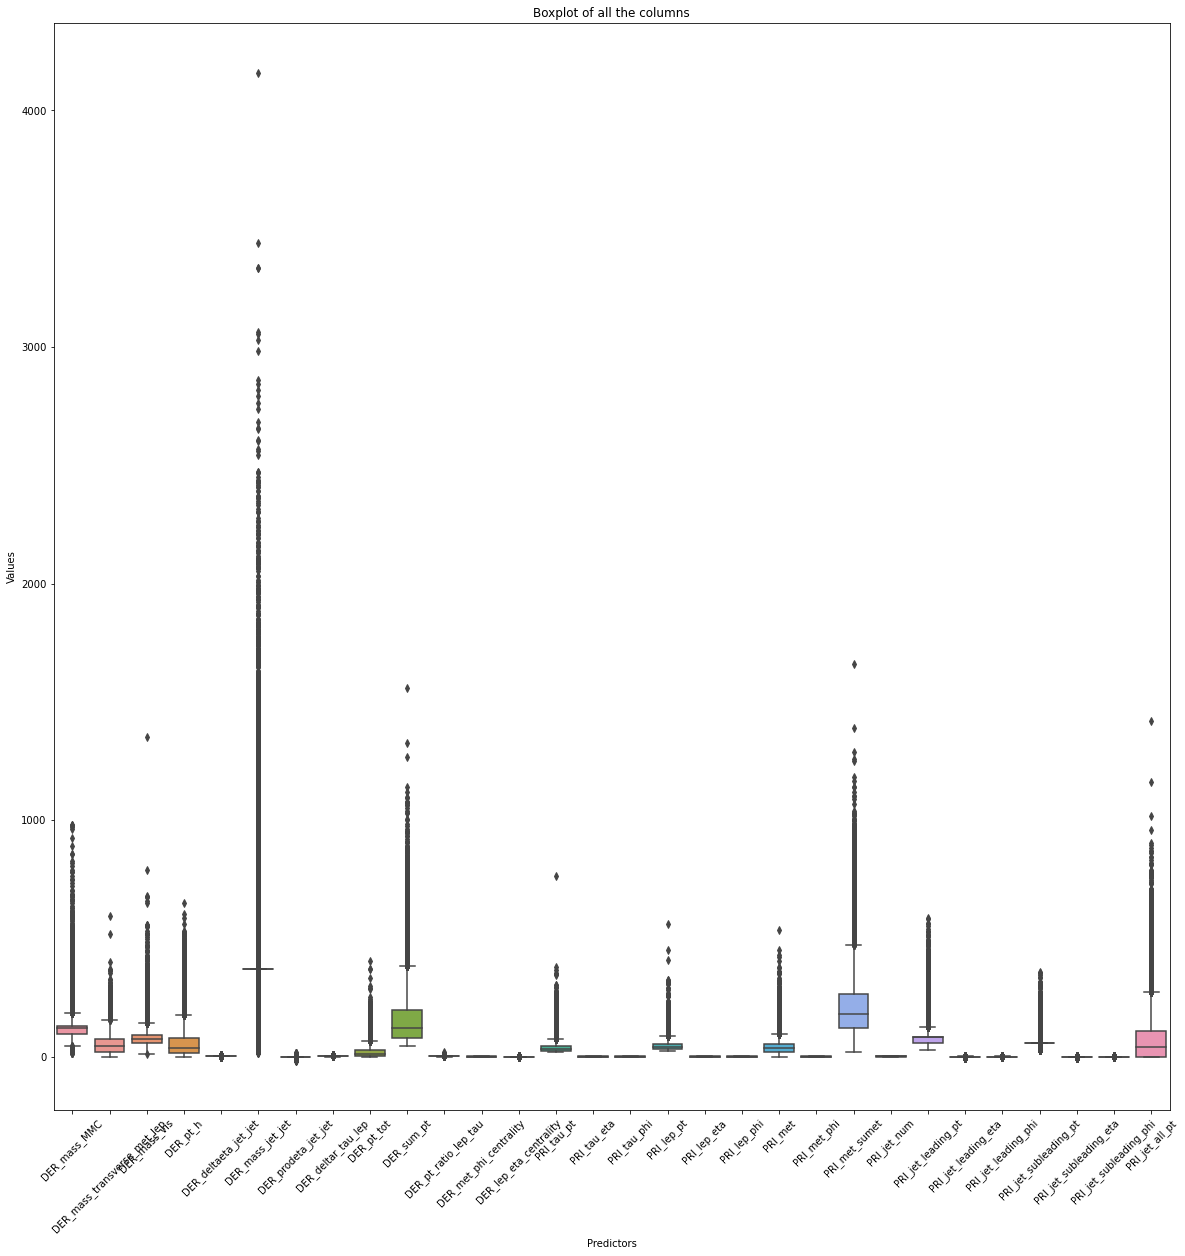

In [15]:
fig, ax = plt.subplots(figsize = (20,20)) # Observing the outliers of the class g.
chart = sns.boxplot(data= X)
plt.title("Boxplot of all the columns")
plt.xticks(rotation=45)
plt.xlabel("Predictors")
plt.ylabel("Values")
plt.show()

In [190]:
X.describe() # Basic statistics of all the features

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,...,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000
mean,122.101445,49.312882,81.325210,57.504144,2.412467,371.361695,-0.836566,2.380112,18.955653,158.089050,...,-0.001906,209.636841,0.980693,84.216275,0.003617,-0.015950,57.337079,-0.021713,0.01734,72.673215
std,53.035977,35.211970,40.800274,62.454983,0.940134,213.818956,1.939146,0.777371,21.718551,115.092376,...,1.814714,126.103019,0.979510,46.307826,1.380884,1.408664,16.938443,1.099002,0.98309,97.525868
min,14.032000,0.002000,10.067000,0.000000,0.001000,14.992000,-17.842000,0.371000,0.000000,46.250000,...,-3.141000,20.543000,0.000000,30.000000,-4.481000,-3.141000,30.000000,-4.495000,-3.14100,-0.000000
25%,95.782500,19.211000,59.622750,14.523500,2.412467,371.361695,-0.836566,1.829000,2.843750,77.647750,...,-1.567000,122.742750,0.000000,57.356000,-0.416000,-0.567000,57.337079,-0.021713,0.01734,0.000000
50%,120.038000,46.505000,73.894500,38.497500,2.412467,371.361695,-0.836566,2.502500,12.479000,120.638500,...,-0.025000,180.095000,1.000000,84.216275,0.003617,-0.015950,57.337079,-0.021713,0.01734,40.385000
75%,130.876000,73.655000,92.576250,78.940500,2.412467,371.361695,-0.836566,2.961000,27.612250,199.177500,...,1.583000,263.108500,2.000000,84.216275,0.442000,0.495000,57.337079,-0.021713,0.01734,109.234000
max,980.192000,595.819000,1349.351000,649.346000,8.459000,4160.527000,16.690000,5.544000,403.195000,1558.993000,...,3.142000,1660.929000,3.000000,587.509000,4.476000,3.140000,356.595000,4.500000,3.14100,1419.777000


Checking the distribution

C:\Users\nazia\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


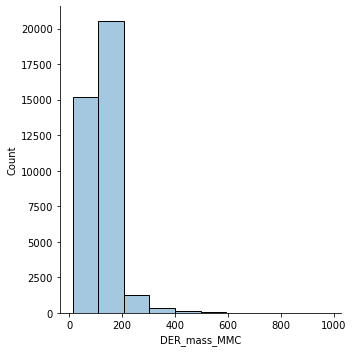

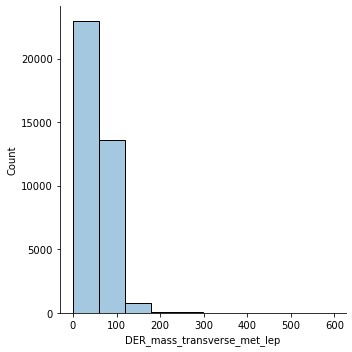

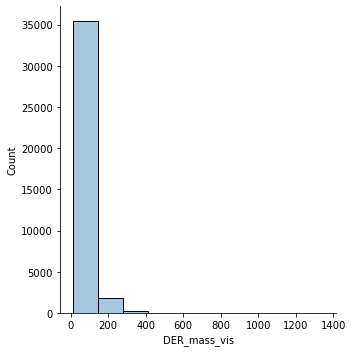

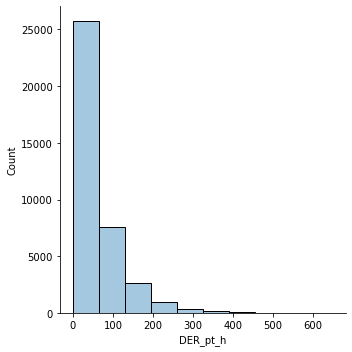

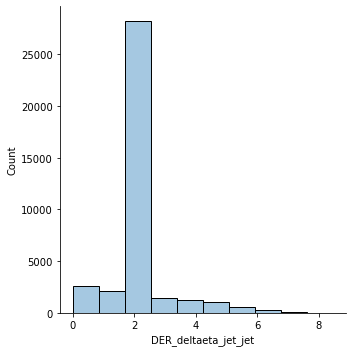

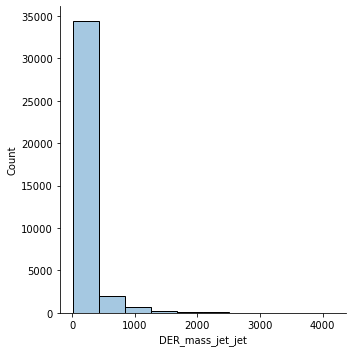

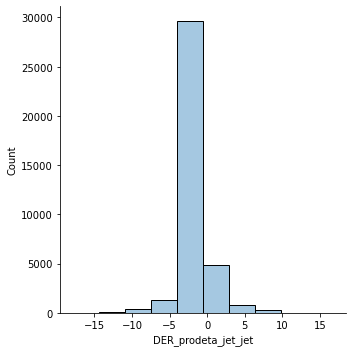

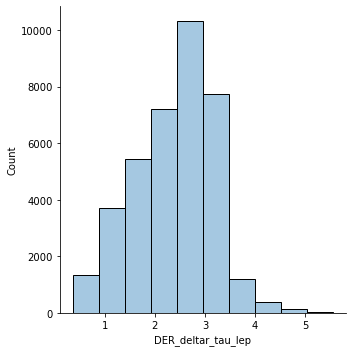

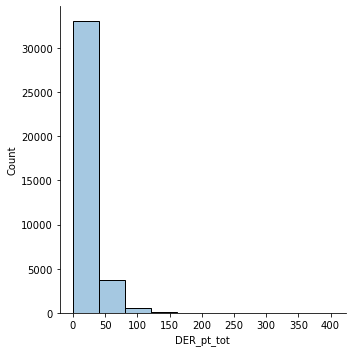

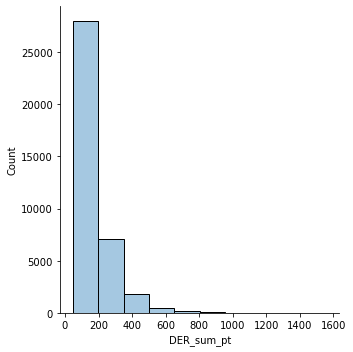

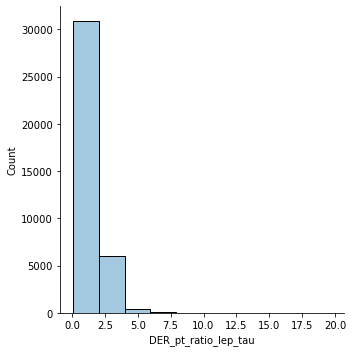

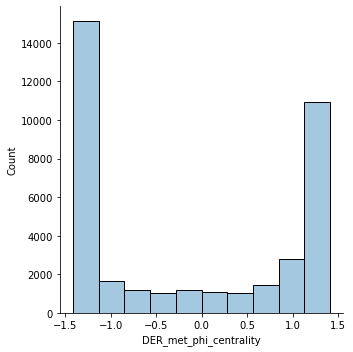

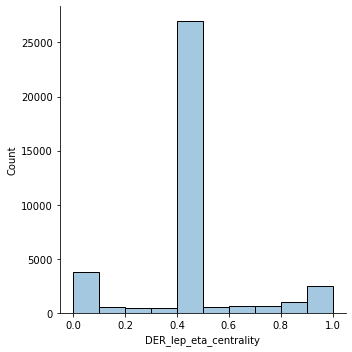

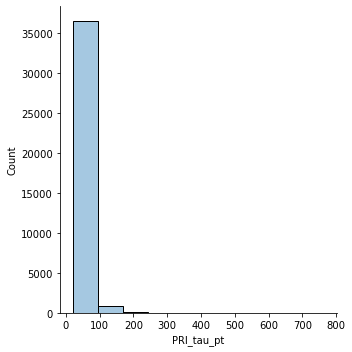

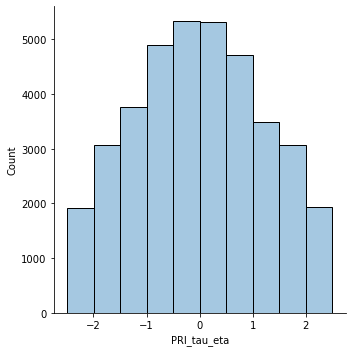

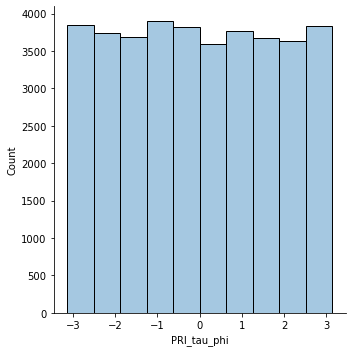

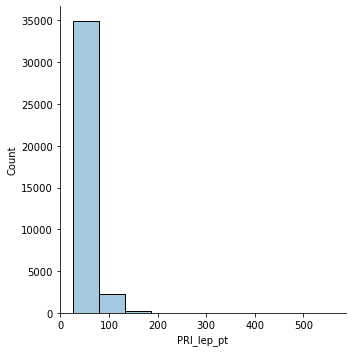

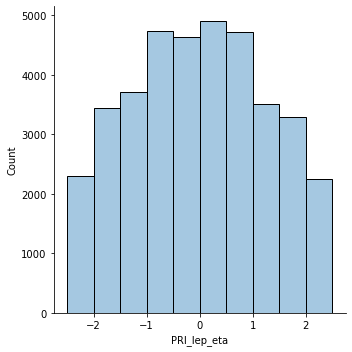

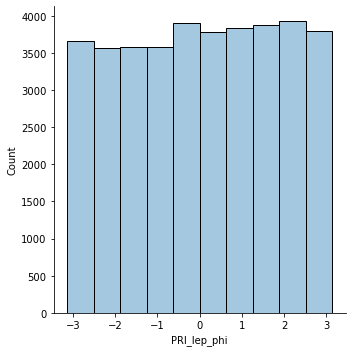

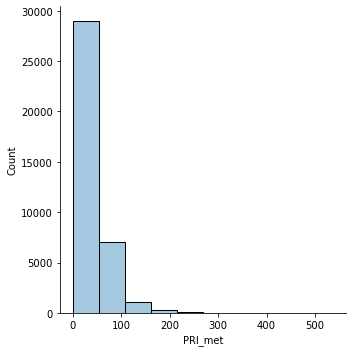

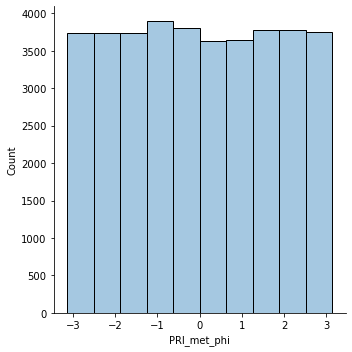

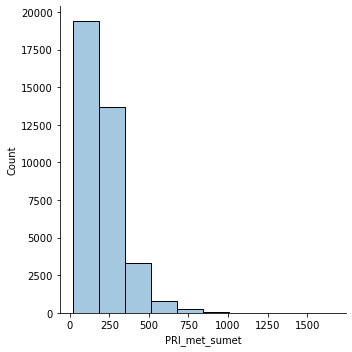

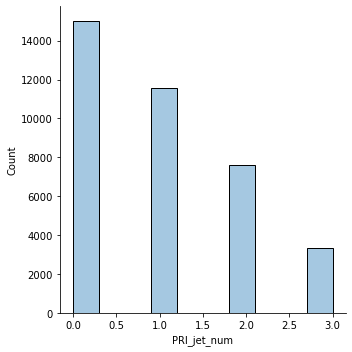

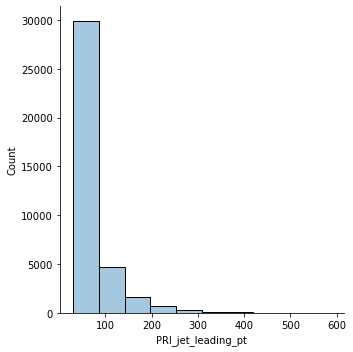

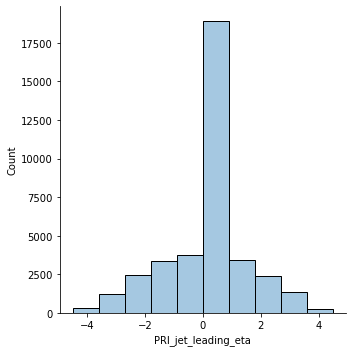

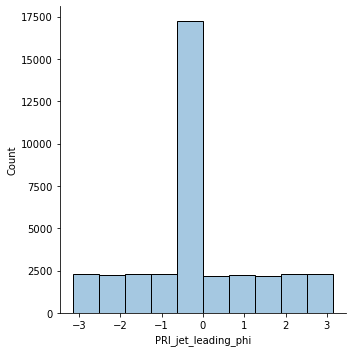

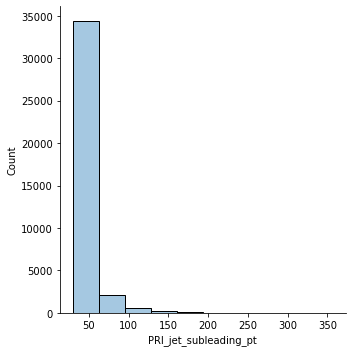

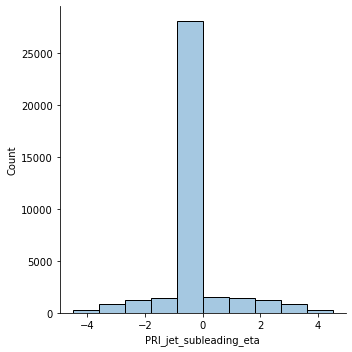

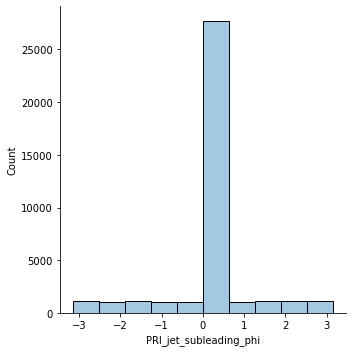

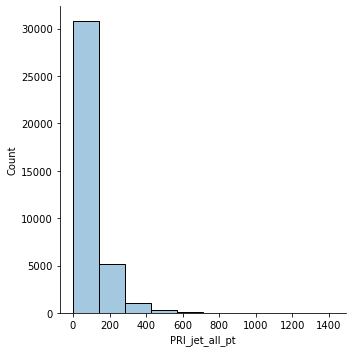

In [16]:
for i in X.columns:
    sns.displot(X,x=i, bins = 10, alpha = 0.4)

Normalizing the training data becuase the predictors have different unit of measurement

In [17]:
from numpy import asarray
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
# transform data
Xscaled = pd.DataFrame(scaler.fit_transform(X))
Xscaled

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-3.252259e-01,-0.170083,-0.231575,0.156336,-1.417123e-15,1.595111e-15,0.000000,-0.308881,-0.823623,-0.054375,...,-0.005563,-0.413825,0.019711,-0.364679,8.164321e-01,1.946516e+00,1.258473e-15,-9.470847e-18,2.823337e-17,-0.054799
1,-8.306482e-15,0.549994,-0.832756,-0.828050,-1.417123e-15,1.595111e-15,0.000000,-1.027980,-0.606248,-0.803496,...,-1.238280,-0.749007,-1.001222,0.000000,-2.669549e-17,2.216670e-17,1.258473e-15,-9.470847e-18,2.823337e-17,-0.745179
2,-2.941900e-01,-1.148684,-0.869839,2.434279,2.828924e+00,4.422217e+00,-2.860799,-1.412615,-0.757595,1.210044,...,0.624848,0.999753,1.040643,1.450611,1.675314e+00,-1.202609e+00,8.942453e-01,-2.487096e+00,-2.470142e+00,1.550387
3,-7.104978e-01,0.326630,-0.015569,-0.905963,-1.417123e-15,1.595111e-15,0.000000,0.559442,-0.830299,-0.893121,...,0.592336,-1.114769,-1.001222,0.000000,-2.669549e-17,2.216670e-17,1.258473e-15,-9.470847e-18,2.823337e-17,-0.745179
4,-4.371514e-01,-0.554134,-0.385964,-0.492844,-1.417123e-15,1.595111e-15,0.000000,0.712524,-0.272980,-0.500370,...,0.143774,0.411218,0.019711,-1.051916,-1.095413e+00,-1.876306e+00,1.258473e-15,-9.470847e-18,2.823337e-17,-0.381116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,-3.102170e-01,1.019301,-0.417949,-0.792872,-1.417123e-15,1.595111e-15,0.000000,0.434661,-0.505089,-0.756273,...,-0.640933,-1.169407,-1.001222,0.000000,-2.669549e-17,2.216670e-17,1.258473e-15,-9.470847e-18,2.823337e-17,-0.745179
37496,-8.613974e-02,-0.772188,-0.575597,0.864760,-1.417123e-15,1.595111e-15,0.000000,0.140074,-0.663895,0.141705,...,0.458429,0.178318,0.019711,0.642421,7.993736e-02,-1.637069e+00,1.258473e-15,-9.470847e-18,2.823337e-17,0.423399
37497,-1.697256e-01,-0.387114,0.142300,0.283790,-1.417123e-15,1.595111e-15,0.000000,-0.038736,-0.717353,0.044990,...,1.170947,-0.393928,0.019711,-0.260354,7.606699e-01,-8.096401e-02,1.258473e-15,-9.470847e-18,2.823337e-17,-0.005262
37498,1.483646e-01,1.357940,-0.345865,0.515576,-4.727759e-01,-1.087634e+00,0.912046,0.502840,1.542727,0.123650,...,0.056156,0.853434,1.040643,-0.673594,-1.713865e+00,2.219118e+00,-4.114411e-01,-3.396645e-01,1.721798e+00,0.314985


C:\Users\nazia\anaconda3\lib\site-packages\seaborn\axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


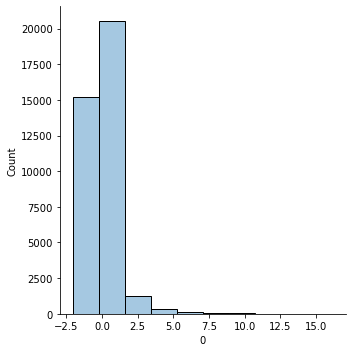

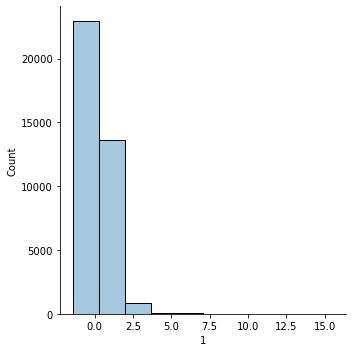

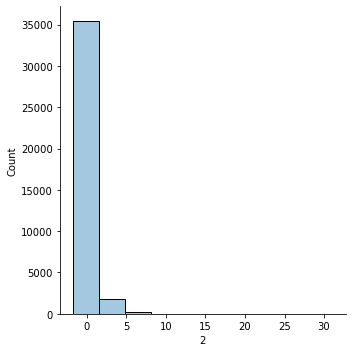

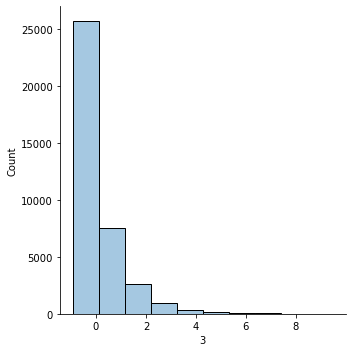

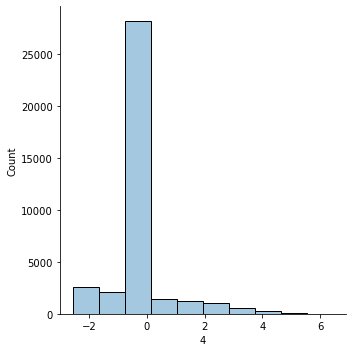

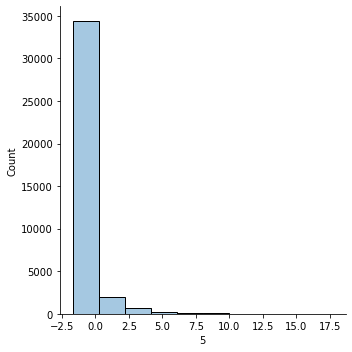

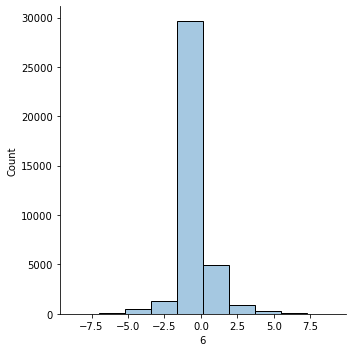

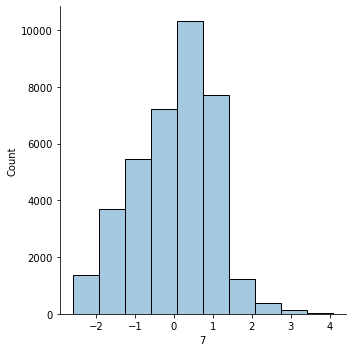

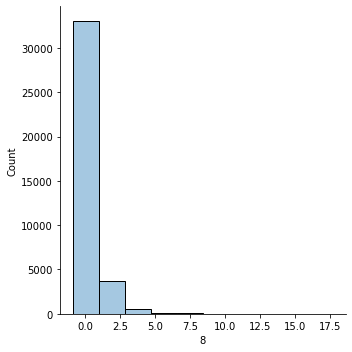

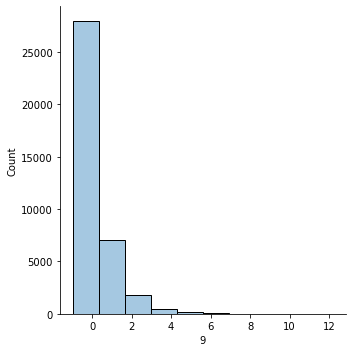

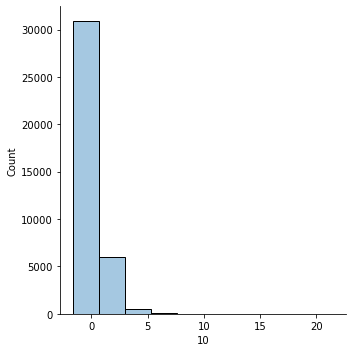

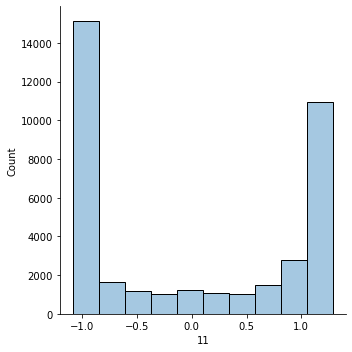

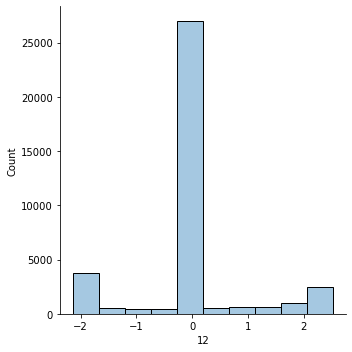

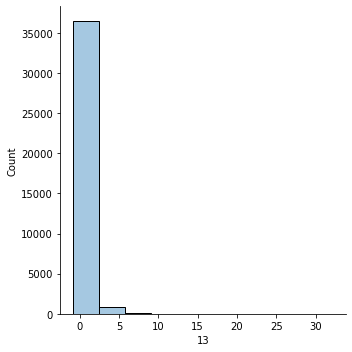

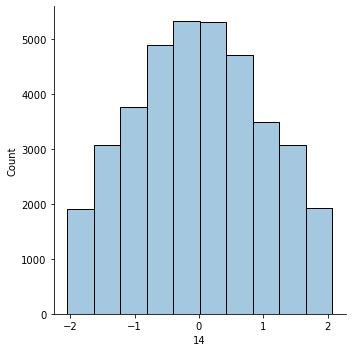

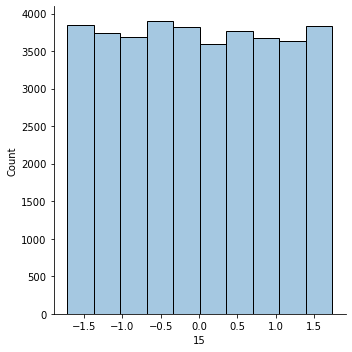

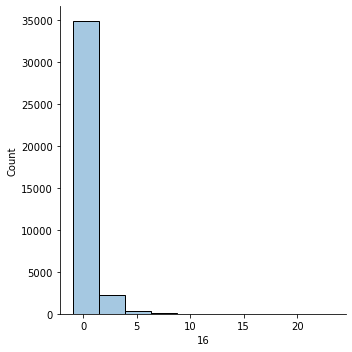

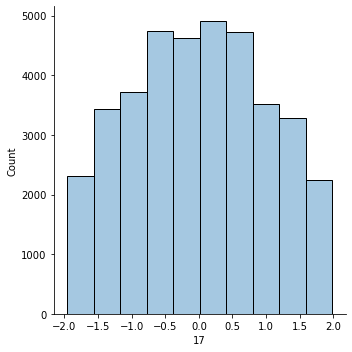

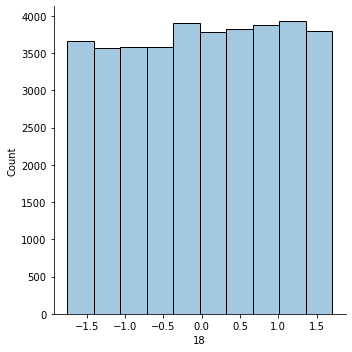

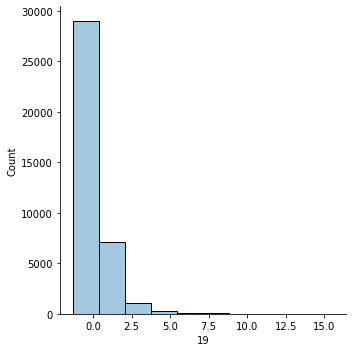

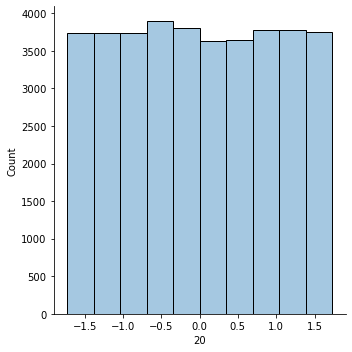

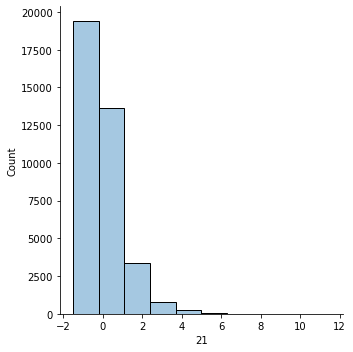

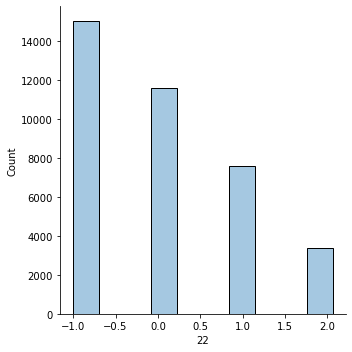

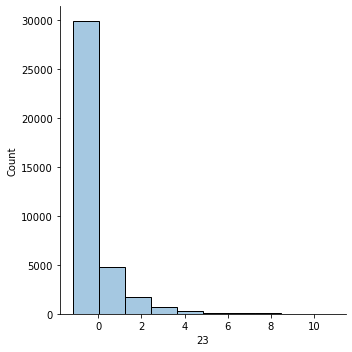

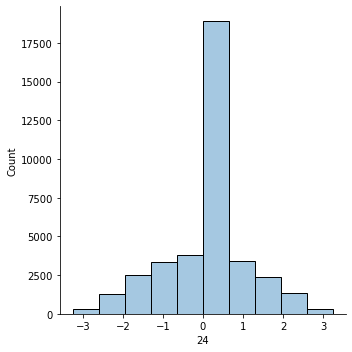

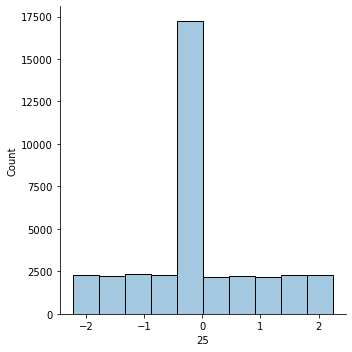

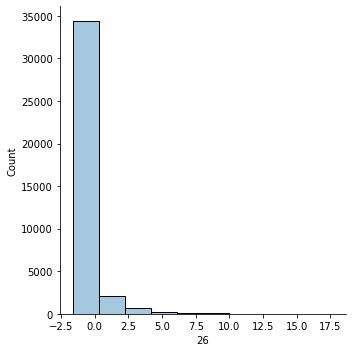

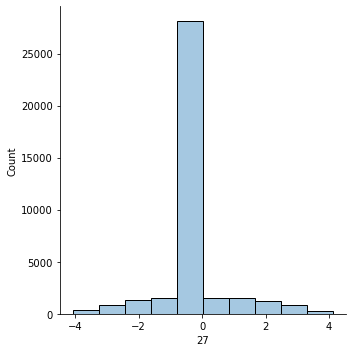

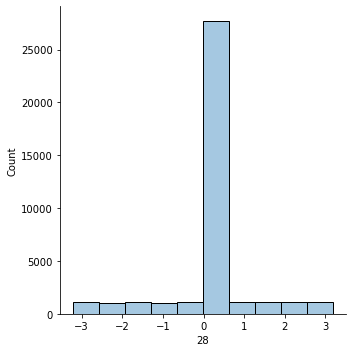

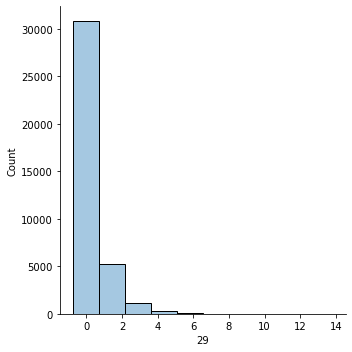

In [189]:
for i in Xscaled.columns:
    sns.displot(Xscaled,x=i, bins = 10, alpha = 0.4)

#### Splitting the train and test data in to 80-20%

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size = 0.2, random_state = 1)

#### Saving the test data - features and traget seperately

In [54]:
import pickle

In [55]:
with open ('X_test.pickle', 'wb') as f:
    pickle.dump(X_test, f)

In [184]:
with open ('y_test.pickle', 'wb') as f:
    pickle.dump(y_test, f)

#### Checking collinearity of the features

In [40]:
higgs_Corr = X_train.corr() # Correlation matrix
higgs_Corr

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.000000,0.170833,0.799546,0.017831,-0.010457,-0.010263,0.004962,0.446731,0.007941,0.114878,...,0.000711,0.082951,0.006852,0.005488,0.004429,0.008429,-0.006365,0.005815,-0.004102,0.007019
1,0.170833,1.000000,0.174226,-0.248249,-0.082039,-0.080969,0.075705,0.038396,0.007802,-0.143627,...,-0.023644,-0.162557,-0.209691,-0.105549,-0.001255,0.008324,-0.018621,0.001351,-0.004722,-0.205748
2,0.799546,0.174226,1.000000,-0.061572,-0.017700,-0.027710,0.014056,0.571889,-0.002372,0.097201,...,-0.000592,0.064675,-0.031903,-0.055232,-0.000233,0.007835,-0.023474,0.004364,-0.002435,-0.051581
3,0.017831,-0.248249,-0.061572,1.000000,-0.022079,0.118760,-0.013610,-0.542866,0.309124,0.832586,...,0.001532,0.782673,0.629923,0.661190,0.007075,0.007848,0.240669,-0.014351,-0.007577,0.809875
4,-0.010457,-0.082039,-0.017700,-0.022079,1.000000,0.799325,-0.837334,0.017666,-0.118613,-0.059013,...,0.000278,-0.080099,-0.044135,-0.030956,0.008635,0.005487,-0.090592,-0.008744,-0.014995,-0.062441
5,-0.010263,-0.080969,-0.027710,0.118760,0.799325,1.000000,-0.765744,-0.057974,-0.027633,0.137869,...,0.003228,0.095744,-0.020961,0.223456,0.014868,0.000922,0.235065,-0.021463,-0.020952,0.141523
6,0.004962,0.075705,0.014056,-0.013610,-0.837334,-0.765744,1.000000,0.000102,0.083570,0.006878,...,-0.000367,0.027226,0.028634,-0.020265,-0.010431,-0.008288,0.002938,0.002729,0.011685,0.009841
7,0.446731,0.038396,0.571889,-0.542866,0.017666,-0.057974,0.000102,1.000000,-0.159284,-0.431400,...,0.001918,-0.405993,-0.352762,-0.368740,-0.004194,0.003070,-0.123212,0.013586,-0.000695,-0.447513
8,0.007941,0.007802,-0.002372,0.309124,-0.118613,-0.027633,0.083570,-0.159284,1.000000,0.411107,...,0.001736,0.478901,0.373443,0.219216,-0.016105,0.005728,0.258610,0.011072,-0.004464,0.433441
9,0.114878,-0.143627,0.097201,0.832586,-0.059013,0.137869,0.006878,-0.431400,0.411107,1.000000,...,0.002278,0.903381,0.758872,0.702466,0.006016,0.007045,0.444056,-0.007457,-0.007913,0.963813


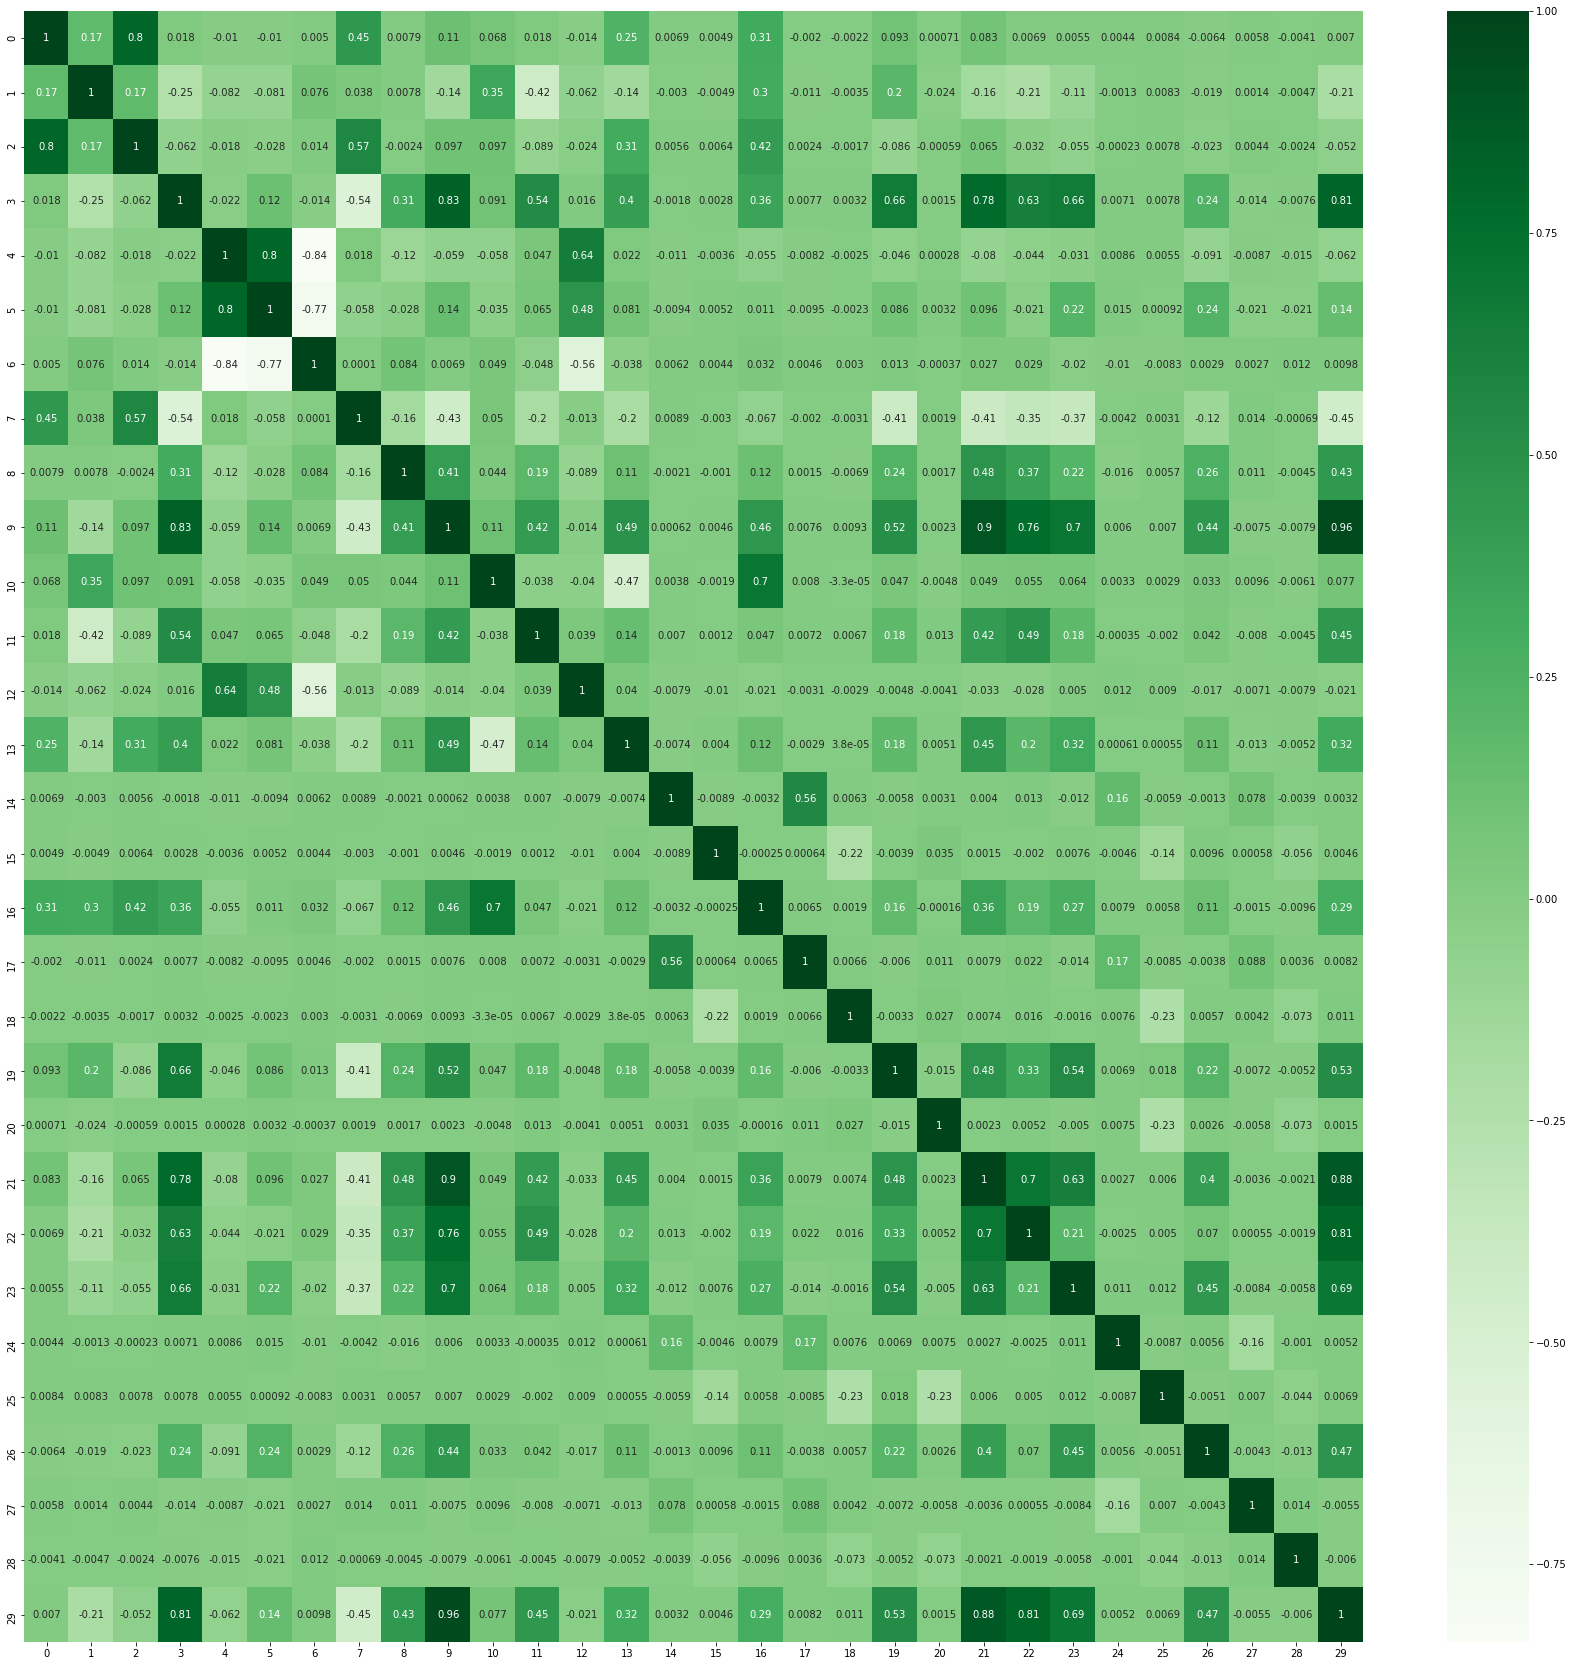

In [105]:
plt.subplots(figsize=(30,30))
Heat_map = sns.heatmap(higgs_Corr, cmap="Greens", annot=True)
plt.show()

#### Checking class imbalance

In [42]:
y_train.value_counts()

0    19771
1    10229
Name: Label, dtype: int64

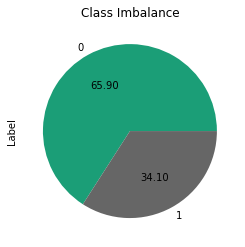

In [102]:
ax = y_train.value_counts().plot.pie(autopct='%.2f', cmap = 'Dark2')
_ = ax.set_title("Class Imbalance") # GnBu

#### Sampling a small dataset to check if SMOTE overfits the data

In [45]:
from sklearn.model_selection import train_test_split #sampling 10% of training set to check the over sampling parameter
x_sample, x_not_use, y_sample, y_not_use = train_test_split(X_train, y_train, test_size=0.9, random_state=42)

In [46]:
y_sample.value_counts()

0    2006
1     994
Name: Label, dtype: int64

Checking the class imbalance in the sample.

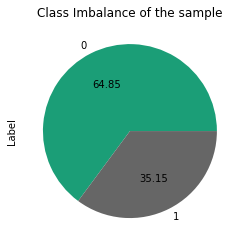

In [103]:
ax = y_sample.value_counts().plot.pie(autopct='%.2f', cmap = 'Dark2')
_ = ax.set_title("Class Imbalance of the sample")

In [50]:
! pip install -U imbalanced-learn

Over sampling the sample dataset to using SMOTE

In [51]:
import imblearn # Importing package
from imblearn.over_sampling import SMOTE

In [52]:
oversample = SMOTE() # over sampling
x_train_s, y_train_s = oversample.fit_resample(x_sample, y_sample)

In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
model_sample = SVC()
model_sample.fit(x_train_s, y_train_s)

SVC()

In [30]:
scores_sample = cross_val_score(model_sample, x_train_s, y_train_s, cv=5)
scores_sample

array([0.79060914, 0.80203046, 0.79695431, 0.82973316, 0.85514612])

In [31]:
scores_sample.mean()

0.814894639413309

In [59]:
x_test_sample, x_not_use_test, y_test_sample, y_not_use_test = train_test_split(x_not_use, y_not_use, 
                                                                                test_size=0.5, random_state=42)

In [33]:
model_sample.score(x_test_sample,y_test_sample)

0.7826666666666666

Checking the model in the test data. There seems to be slight over fitting but I am not sure if this is due to SMOTE.

In [37]:
# from sklearn.utils import class_weight
# class_weight = class_weight.compute_class_weight('balanced',np.unique(y_sample),np.array(y_sample))
# model_balance = SVC(class_weight = class_weight)
# model_balance.fit(x_sample,y_sample)

Tried class weight method on the sample but it didn't help with the overfitting. So, decided to move ahead with SMOTE.

Using SMOTE to balance the data

In [115]:
! pip install -U imbalanced-learn

Over sampling 

In [56]:
oversample_train = SMOTE()
X_train_O, y_train_O = oversample_train.fit_resample(X_train, y_train)

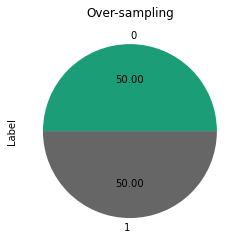

In [122]:
ax = y_train_O.value_counts().plot.pie(autopct='%.2f', cmap = 'Dark2')
_ = ax.set_title("Over-sampling")

#### Baseline Model

In [58]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
model_baseline = SVC()
model_baseline.fit(X_train_O, y_train_O)

SVC()

In [60]:
scores = cross_val_score(model_baseline, X_train_O, y_train_O, cv=5)
scores

array([0.82235428, 0.81881401, 0.83055134, 0.85596864, 0.85154274])

In [205]:
scores.mean()

0.8358462021171146

#### Taking out a small sample of data to experiment with PCA and visualize the decision boundaries

Text(0, 0.5, 'Cum_Variance')

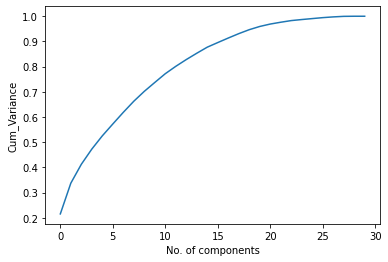

In [62]:
from sklearn.decomposition import PCA # Checking how many components capture maximum variance
pca_test = PCA(n_components = 30)
pca_test.fit(X_train_O)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel("No. of components")
plt.ylabel("Cum_Variance")

Sampling 10% of the train data for PCA

In [63]:
Higgsdf_samples = Higgsdf.sample(frac = 0.05)

In [64]:
Higgsdf_samples.shape

(1875, 31)

In [65]:
X_sample = Higgsdf_samples.drop(['Label'], axis=1)
y_sample = Higgsdf_samples['Label']

Splitting the sample data

In [66]:
from sklearn.model_selection import train_test_split
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split
(X_sample, y_sample, test_size = 0.2, random_state = 0)

Using PCA, reducing the dimension into 2 components

In [67]:
from sklearn.preprocessing import StandardScaler
pca = PCA(n_components=2)
scaler = StandardScaler()
X_train_pca = pca.fit_transform(X_train_sample)

In [93]:
X_sample_pca = pca.fit_transform(X_sample)

In [94]:
from sklearn.model_selection import train_test_split
X_train_sample1, X_test_sample1, y_train_sample1, y_test_sample1 = train_test_split(X_sample_pca, y_sample, test_size = 0.2, random_state = 0)

Using scatterplot to visualize the two components

Text(0, 0.5, 'Second Principal Component')

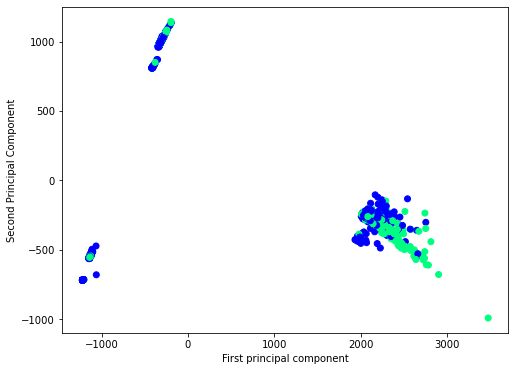

In [118]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1],c=y_train_sample,cmap='winter')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Reference for the below plot function : https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

#### Interactive 3D visualization

In [115]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

r = np.exp(-(X_train_pca ** 2).sum(1))
def plot_3D(elev=30, azim=30, X=X, y=y):
    fig, ax=plt.subplots(10,8)
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='winter')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-45, 45], azip=(-180, 180),
        X= fixed(X_train_pca), y= fixed(y_train_sample));

interactive(children=(Dropdown(description='elev', options=(-45, 45), value=-45), IntSlider(value=30, descript…

In [78]:
model_pca = SVC(kernel='linear')
model_pca.fit(X_train_pca, y_train_sample)

SVC(kernel='linear')

In [79]:
scores_pca = cross_val_score(model_pca, X_train_pca, y_train_sample, cv=5)
scores_pca

array([0.65666667, 0.65333333, 0.65333333, 0.65333333, 0.65333333])

In [80]:
scores_pca.mean()

0.654

Reference for the below plot function : https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [81]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

#### Kernel - linear

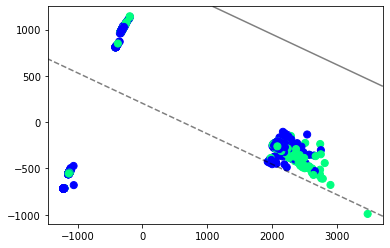

In [119]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_sample, s=50, cmap='winter')
plot_svc_decision_function(model_pca);

In [83]:
model_pca_1 = SVC(kernel='rbf')
model_pca_1.fit(X_train_pca, y_train_sample)

SVC()

In [84]:
model_pca_1.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### Kernel - rbf

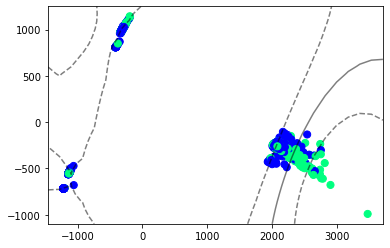

In [120]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_sample, s=50, cmap='winter')
plot_svc_decision_function(model_pca_1);

In [86]:
model_pca_2 = SVC(kernel='poly')
model_pca_2.fit(X_train_pca, y_train_sample)

SVC(kernel='poly')

#### Kernel - poly

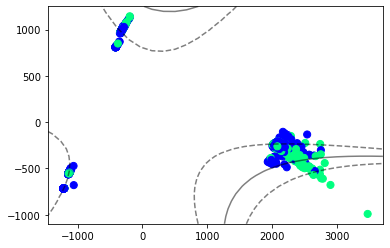

In [123]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_sample, s=50, cmap='winter')
plot_svc_decision_function(model_pca_2);

The below commented out codes were insipered from - https://www.analyticsvidhya.com/blog/2021/04/insight-into-svm-support-vector-machine-along-with-code/ . I wanted to visualize the margins impacted by C - regularization parameter. But due to out of memory error I couldn't execute it.

In [91]:
# from matplotlib.colors import ListedColormap

# def decision_boundary(X,y,model,res,test_idx=None):
#     markers=['s','o','x']
#     colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
#     colormap=ListedColormap(colors[:len(np.unique(y))])
#     x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
#     y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
#     xx,yy=np.meshgrid(np.arange(x_min,x_max,res),np.arange(y_min,y_max,res))
#     z=model.predict(np.c_[xx.ravel(), yy.ravel()])
#     zz=z.reshape(xx.shape)
#     plt.pcolormesh(xx,yy,zz,cmap=colormap)

#     for idx,cl in enumerate(np.unique(y)):
#         plt.scatter(X[y==cl,0],X[y==cl,1],c=colors[idx],cmap=plt.cm.Paired, edgecolors='k',marker=markers[idx],label=cl,alpha=0.8)

In [96]:
# plt.figure(figsize=(5,5))
# model_c_10 = SVC(kernel='poly', random_state=1, C=10)
# model_c_10.fit(X_train_sample1,y_train_sample1)
# decision_boundary(np.vstack((X_train_sample1,X_test_sample1)),np.hstack((y_train_sample1,y_test_sample1)),model_c_10,
#                   0.02,test_idx=None)
# plt.title('C=10')
# plt.legend(loc='upper left')
# plt.tight_layout()
# plt.show()

As per the kernel plots, the data is highly non linear. So, choosing low value of C could lead to error and choosing very high value of C could lead to hard margin. So, I am going to tune the parameters below.

#### Searching the GridSearch to select the best hyperparameter

In [98]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
random_state = 1 
param_grid_k = {'kernel': ['rbf', 'linear','poly','sigmoid']}
grid = GridSearchCV(SVC(), param_grid_k, refit = True, verbose = 3)
 
# fitting the model for grid search
%time grid.fit(X_train_O, y_train_O)
best_kernel = grid.best_params_
print(best_kernel)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........................kernel=rbf;, score=0.822 total time= 1.6min
[CV 2/5] END ........................kernel=rbf;, score=0.819 total time= 1.7min
[CV 3/5] END ........................kernel=rbf;, score=0.831 total time= 1.9min
[CV 4/5] END ........................kernel=rbf;, score=0.856 total time= 1.8min
[CV 5/5] END ........................kernel=rbf;, score=0.852 total time= 1.8min
[CV 1/5] END .....................kernel=linear;, score=0.741 total time= 3.6min
[CV 2/5] END .....................kernel=linear;, score=0.736 total time= 3.7min
[CV 3/5] END .....................kernel=linear;, score=0.746 total time= 3.4min
[CV 4/5] END .....................kernel=linear;, score=0.761 total time= 4.1min
[CV 5/5] END .....................kernel=linear;, score=0.760 total time= 4.7min
[CV 1/5] END .......................kernel=poly;, score=0.787 total time= 1.8min
[CV 2/5] END .......................kernel=poly;,

As per Gridsearch - rbf is the best kernel

In [106]:
random_state = 1
param_grid_C = {'C': [1, 10, 100]}
grid_C = GridSearchCV(SVC(), param_grid_C, refit = True, verbose = 3)
 
# fitting the model for grid search
%time grid_C.fit(X_train_O, y_train_O)
best_C = grid_C.best_params_
print(best_C)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...............................C=1;, score=0.822 total time= 1.5min
[CV 2/5] END ...............................C=1;, score=0.819 total time= 1.2min
[CV 3/5] END ...............................C=1;, score=0.831 total time= 1.2min
[CV 4/5] END ...............................C=1;, score=0.856 total time= 1.3min
[CV 5/5] END ...............................C=1;, score=0.852 total time= 1.3min
[CV 1/5] END ..............................C=10;, score=0.827 total time= 2.2min
[CV 2/5] END ..............................C=10;, score=0.823 total time= 2.3min
[CV 3/5] END ..............................C=10;, score=0.837 total time= 2.2min
[CV 4/5] END ..............................C=10;, score=0.871 total time= 2.1min
[CV 5/5] END ..............................C=10;, score=0.872 total time= 2.0min
[CV 1/5] END .............................C=100;, score=0.818 total time= 5.3min
[CV 2/5] END .............................C=100;,

As per Gridsearch - the best C is 10

In [107]:
random_state = 1
param_grid_G = {'gamma': [0.008, 0.01, 0.05, 0.1, 0.5]}
grid_G = GridSearchCV(SVC(), param_grid_G, refit = True, verbose = 3)
 
# fitting the model for grid search
%time grid_G.fit(X_train_O, y_train_O)
best_G = grid_G.best_params_
print(best_G)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .......................gamma=0.008;, score=0.802 total time= 1.1min
[CV 2/5] END .......................gamma=0.008;, score=0.796 total time=  58.8s
[CV 3/5] END .......................gamma=0.008;, score=0.805 total time= 1.2min
[CV 4/5] END .......................gamma=0.008;, score=0.827 total time= 1.2min
[CV 5/5] END .......................gamma=0.008;, score=0.824 total time= 1.2min
[CV 1/5] END ........................gamma=0.01;, score=0.807 total time= 1.4min
[CV 2/5] END ........................gamma=0.01;, score=0.801 total time= 1.4min
[CV 3/5] END ........................gamma=0.01;, score=0.811 total time= 1.1min
[CV 4/5] END ........................gamma=0.01;, score=0.830 total time= 1.1min
[CV 5/5] END ........................gamma=0.01;, score=0.829 total time= 1.2min
[CV 1/5] END ........................gamma=0.05;, score=0.825 total time= 1.4min
[CV 2/5] END ........................gamma=0.05;,

As per Gridsearch - the best gamma is 0.5

In [116]:
model_gridsearch = SVC(kernel='rbf', gamma = 0.5, C = 10)
%time model_gridsearch.fit(X_train_O, y_train_O)

Wall time: 8min 43s


SVC(C=10, gamma=0.5)

In [124]:
scores_gridsearch = cross_val_score(model_gridsearch, X_train_O, y_train_O, cv=5)
%time scores_gridsearch

Wall time: 0 ns


array([0.8194462 , 0.80895183, 0.8458523 , 0.92994436, 0.93184117])

In [125]:
scores_gridsearch.mean()

0.8672071725334456

This clearly seems to be a overfitting case. I believe it is better to let some points enter the margin than overfit. So, I am using gamma = 0.008 to check if the can overcome overfitting.

In [126]:
model_gamma_tuned = SVC(kernel='rbf', gamma = 0.008, C = 10)
%time model_gamma_tuned.fit(X_train_O, y_train_O)

Wall time: 1min 27s


SVC(C=10, gamma=0.008)

In [127]:
%time scores_gamma_tuned = cross_val_score(model_gamma_tuned, X_train_O, y_train_O, cv=5)
scores_gamma_tuned

Wall time: 5min 40s


array([0.82298647, 0.81375648, 0.82637835, 0.85128983, 0.84686394])

In [128]:
scores_gamma_tuned.mean()

0.8322550140882381

The model still seems to be overfitted. 

In [129]:
model_gamma_tuned1 = SVC(kernel='rbf', gamma = 0.008, C = 1)
%time model_gamma_tuned1.fit(X_train_O, y_train_O)

Wall time: 1min 25s


SVC(C=1, gamma=0.008)

In [130]:
%time scores_gamma_tuned1 = cross_val_score(model_gamma_tuned1, X_train_O, y_train_O, cv=5)
scores_gamma_tuned1

Wall time: 5min 33s


array([0.80237704, 0.79605513, 0.80462822, 0.82713708, 0.82359636])

In [131]:
scores_gamma_tuned1.mean()

0.8107587649932755

Trying to tune it further, to decrease the overfitting

In [132]:
model_gamma_tuned2 = SVC(kernel='rbf', gamma = 0.001, C = 10)
%time model_gamma_tuned2.fit(X_train_O, y_train_O)

Wall time: 1min 26s


SVC(C=10, gamma=0.001)

In [133]:
%time scores_gamma_tuned2 = cross_val_score(model_gamma_tuned2, X_train_O, y_train_O, cv=5)
scores_gamma_tuned2

Wall time: 6min 13s


array([0.77885953, 0.77038817, 0.78110774, 0.79994942, 0.79881133])

In [134]:
scores_gamma_tuned2.mean()

0.7858232360219397

In [135]:
model_gamma_tuned2.get_params()

{'C': 10,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.001,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

The model - "model_gamma_tuned2" is considered to be the best model. Although, the error has increased due to soft margin but I could successfully avoid overfitting and generalize the model.

### BEST MODEL IN SVM

In [136]:
with open ('Best_Model_SVM.pickle', 'wb') as f:
    pickle.dump(model_gamma_tuned2, f)

Loading the pickle file again to measure the metrics

In [137]:
with open ('Best_Model_SVM.pickle', 'rb') as f:
    Best_Model_SVM = pickle.load(f)

In [138]:
Best_Model_SVM.score(X_test,y_test)

0.7728

The accuracy as per cross validation is 78.5% and the accuracy as per the test data is 77.3%

In [139]:
y_Pred = Best_Model_SVM.predict(X_test)

#### Classification Report

In [140]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_Pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      4966
           1       0.63      0.81      0.71      2534

    accuracy                           0.77      7500
   macro avg       0.76      0.78      0.76      7500
weighted avg       0.80      0.77      0.78      7500



#### Confusion Matrix

C:\Users\nazia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x720 with 0 Axes>

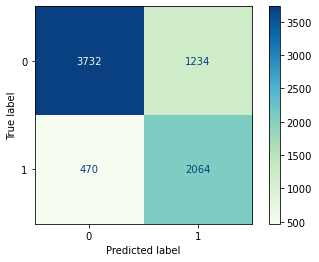

In [141]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize = (10,10))
plot_confusion_matrix(Best_Model_SVM, X_test, y_test, cmap = 'GnBu')  
plt.show()

In [142]:
from sklearn.metrics import roc_curve,roc_auc_score,auc
roc_auc_score(y_test, y_Pred)

0.7830163819576912

In [143]:
SVM_FP, SVM_TP, SVM_thresh = roc_curve(y_test, y_Pred)

In [144]:
SVM_AUC = auc(SVM_FP, SVM_TP)

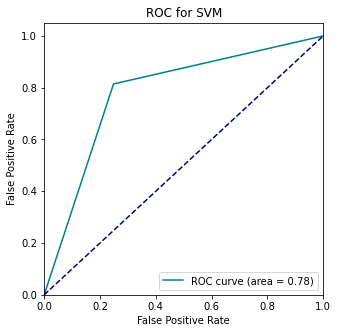

In [146]:
plt.figure(figsize = (5,5))
plt.plot(SVM_FP, SVM_TP, color = "teal", label = "ROC curve (area = %0.2f)" % SVM_AUC)
plt.plot([0,1], [0,1], color = "navy", linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ROC for SVM")
plt.legend(loc = "lower right")
plt.show()

## Multi Layer Perceptron

In [147]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

#### Creating a Baseline Model

In [148]:
clf = MLPClassifier(random_state=1) # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
%time clf.fit(X_train_O, y_train_O)

Wall time: 37.9 s


C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=1)

In [149]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [150]:
%time scores_MLP = cross_val_score(clf, X_train_O, y_train_O, cv=5)
scores_MLP

C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Wall time: 2min 47s


C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0.81274497, 0.8135036 , 0.8292868 , 0.86633789, 0.85925645])

In [151]:
scores_MLP.mean()

0.8362259421199401

In [152]:
clf.best_loss_

0.2934676089680509

In [153]:
clf.loss_

0.29379894379879784

The baseline model already proved to be a better model than SVM. But I can sense overfitting in the model. So, I will try to improve the accuracy further by tuning the hyperparameters.

#### Selecting the number of epochs

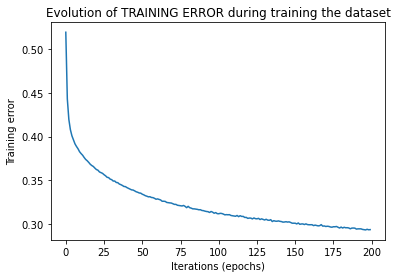

In [154]:
# Plot the LEARNING CURVE to help decide on the number of epochs
plt.title("Evolution of TRAINING ERROR during training the dataset")
plt.xlabel("Iterations (epochs)")
plt.ylabel("Training error")
plt.plot(clf.loss_curve_)
plt.show()

In [155]:
clf_iter = MLPClassifier(random_state=1, max_iter=500) # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
%time clf_iter.fit(X_train_O, y_train_O)

Wall time: 1min 9s


MLPClassifier(max_iter=500, random_state=1)

In [156]:
clf_iter.best_loss_

0.2833506966569069

In [157]:
clf_iter.loss_

0.2846108248366761

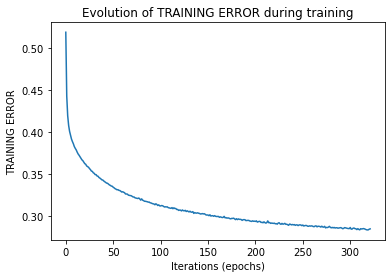

In [158]:
# Plot the LEARNING CURVE
plt.title("Evolution of TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(clf_iter.loss_curve_)
plt.show()

From the above two graphs, it seems like 300 epochs would be ideal as after that there is a probable chance of overfitting.

#### Grid seach for number of hidden layers. The below combinations were chosen on the basis of the paper on Higgs Boson classification, default value and as per this article provided in discussion forum - https://www.heatonresearch.com/2017/06/01/hidden-layers.html 

In [160]:
parameter_grid_hidden = {
    'hidden_layer_sizes': [(22,),(25,),(35,),(45,),(50,),(75,)]}

# Solver/optimizer - https://www.youtube.com/watch?v=mdKjMPmcWjY
grid_mlp_hidden = GridSearchCV(MLPClassifier(random_state=1, max_iter=300), parameter_grid_hidden, n_jobs=-1, verbose = 3)
 
# fitting the model for grid search
%time grid_mlp_hidden.fit(X_train_O, y_train_O)
best_mlp_hidden = grid_mlp_hidden.best_params_
print(best_mlp_hidden)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Wall time: 3min 15s
{'hidden_layer_sizes': (75,)}


As per the grid search - the best hidden layer size is 75

In [161]:
clf_hidden = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes = (75,))
%time clf_hidden.fit(X_train_O, y_train_O)

Wall time: 40.3 s


MLPClassifier(hidden_layer_sizes=(75,), max_iter=300, random_state=1)

In [162]:
%time scores_hidden = cross_val_score(clf_hidden, X_train_O, y_train_O, cv=5)
scores_hidden

C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Wall time: 3min 9s


array([0.81527374, 0.81021621, 0.83080425, 0.86368235, 0.86292362])

As per the research paper, hidden layer - (175,90) provides the best results and the above grid search proved the same.

In [163]:
clf_hidden1 = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes = (175, 90))
%time clf_hidden1.fit(X_train_O, y_train_O)

Wall time: 3min 4s


C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(175, 90), max_iter=300, random_state=1)

In [164]:
%time scores_hidden1 = cross_val_score(clf_hidden1, X_train_O, y_train_O, cv=5)
scores_hidden1

Wall time: 14min 20s


C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0.82121634, 0.81540018, 0.83624178, 0.88391502, 0.88935255])

In [165]:
clf_hidden2 = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes = (35,))
%time clf_hidden2.fit(X_train_O, y_train_O)

Wall time: 50.4 s


MLPClassifier(hidden_layer_sizes=(35,), max_iter=300, random_state=1)

In [166]:
%time scores_hidden2 = cross_val_score(clf_hidden2, X_train_O, y_train_O, cv=5)
scores_hidden2

C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Wall time: 3min 48s


array([0.81754963, 0.81426223, 0.82637835, 0.85520991, 0.85520991])

#### Deep diving into L2 regularization and weight decay regularization

In [167]:
clf_sgd = MLPClassifier(random_state=1, max_iter=300, solver = 'sgd', 
                        learning_rate = 'constant', momentum = 0.9, learning_rate_init = 0.01) # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
%time clf_sgd.fit(X_train_O, y_train_O)

Wall time: 1min 36s


C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(learning_rate_init=0.01, max_iter=300, random_state=1,
              solver='sgd')

In [168]:
clf_sgd_lr = MLPClassifier(random_state=1, max_iter=300, solver = 'sgd', 
                           learning_rate = 'constant', momentum = 0.9, learning_rate_init = 0.001) # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
%time clf_sgd_lr.fit(X_train_O, y_train_O)

Wall time: 1min 38s


C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=300, random_state=1, solver='sgd')

In [169]:
clf_adam = MLPClassifier(random_state=1, max_iter=300,solver = 'adam', learning_rate_init = 0.01 ) # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
%time clf_adam.fit(X_train_O, y_train_O)

Wall time: 51 s


MLPClassifier(learning_rate_init=0.01, max_iter=300, random_state=1)

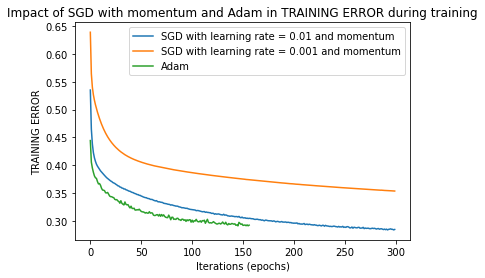

In [170]:
plt.title("Impact of SGD with momentum and Adam in TRAINING ERROR during training")
plt.xlabel("Iterations (epochs)")
plt.ylabel("TRAINING ERROR")
plt.plot(clf_sgd.loss_curve_ , label = "SGD with learning rate = 0.01 and momentum")
plt.plot(clf_sgd_lr.loss_curve_ , label = "SGD with learning rate = 0.001 and momentum")
plt.plot(clf_adam.loss_curve_ ,  label = "Adam")
plt.legend()
plt.show()

Most popular adaptive gradient method, Adam outperforms stochastic gradient descent.

Running a grid search for the remaining parameters - activation & learning rate. Choose the hidden layer size as per the thumb rule provided by the Heaton Reasearch article as none of the hidden layer sizes are providing good results. As per above grapgh, using Adam as solver

In [191]:
random_state = 1
parameter_grid = {
    'hidden_layer_sizes': [35,],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['adam'],
    'learning_rate_init':[0.0001, 0.001, 0.01]
}

grid_mlp = GridSearchCV(MLPClassifier(random_state=1, max_iter=300), parameter_grid, n_jobs=-1, verbose = 3)
 
# fitting the model for grid search
%time grid_mlp.fit(X_train_O, y_train_O)
best_mlp = grid_mlp.best_params_
print(best_mlp)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Wall time: 7min 21s
{'activation': 'logistic', 'hidden_layer_sizes': 35, 'learning_rate_init': 0.001, 'solver': 'adam'}


C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Creating the model using all the best parameters

In [192]:
clf_gridsearch = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes = (35,), activation = 'logistic',
                           solver = 'adam', learning_rate_init = 0.001, early stopping = ) # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
%time clf_gridsearch.fit(X_train_O, y_train_O)

Wall time: 1min 1s


C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(35,), max_iter=300,
              random_state=1)

In [193]:
%time scores_gridsearch = cross_val_score(clf_gridsearch, X_train_O, y_train_O, cv=5)
scores_gridsearch

C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Wall time: 4min 18s


C:\Users\nazia\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0.82361866, 0.81615881, 0.82372281, 0.85660091, 0.85761254])

In [194]:
scores_gridsearch.mean()

0.8355427471555712

In [207]:
clf_gridsearch.coefs_;

In [208]:
clf_gridsearch.intercepts_

[array([ 0.99883017,  0.97390283,  0.25425474, -1.59829457,  0.01194807,
        -3.1118935 , -1.54406926,  0.44247517, -1.26681227, -0.81647792,
         0.89035128,  0.67492697,  0.26854059,  0.74332358,  1.30502535,
        -0.69442974,  0.01941453, -1.78610599,  2.38955131,  1.11194919,
        -0.31422224,  2.81944483,  1.40404667,  2.15045091,  1.04084923,
        -0.93519701,  0.19821213, -0.36104543, -2.87013616,  1.66759856,
         2.65846621,  2.36744579, -0.65348664,  0.68772508, -1.66367407]),
 array([-0.37594233])]

In [209]:
clf_gridsearch.t_

11862600

In [210]:
clf_gridsearch.out_activation_

'logistic'

In [213]:
clf_gridsearch1 = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes = (35,), activation = 'logistic',
                           solver = 'adam', learning_rate_init = 0.001, early_stopping = True ) # https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
%time clf_gridsearch1.fit(X_train_O, y_train_O)

Wall time: 6.59 s


MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(35,), max_iter=300, random_state=1)

In [214]:
%time scores_gridsearch1 = cross_val_score(clf_gridsearch1, X_train_O, y_train_O, cv=5)
scores_gridsearch1

Wall time: 34.6 s


array([0.82197497, 0.81363004, 0.82701062, 0.84003541, 0.84711684])

In [215]:
scores_gridsearch1.mean()

0.8299535759988125

### BEST MODEL FOR MLP

#### Best model - the model developed using the hyperparameters tuned manually and grid search turns out to be the best model. However, there still seems to be overfitting in the model. So, adding early stopping helped to overcome the overfitting

In [216]:
with open ('BEST_MODEL_MLP.pickle', 'wb') as f:
    pickle.dump(clf_gridsearch1, f)

In [217]:
with open ('BEST_MODEL_MLP.pickle', 'rb') as f:
    BEST_MODEL_MLP = pickle.load(f)

In [ ]:
with open ('X_test.pickle', 'rb') as f:
    X_test = pickle.load(f)

In [218]:
with open ('y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)

In [219]:
BEST_MODEL_MLP.score(X_test,y_test)

0.8206666666666667

In [220]:
y_Pred_mlp = BEST_MODEL_MLP.predict(X_test)
print(classification_report(y_test, y_Pred_mlp))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86      4966
           1       0.70      0.81      0.75      2534

    accuracy                           0.82      7500
   macro avg       0.80      0.82      0.81      7500
weighted avg       0.83      0.82      0.82      7500



C:\Users\nazia\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x720 with 0 Axes>

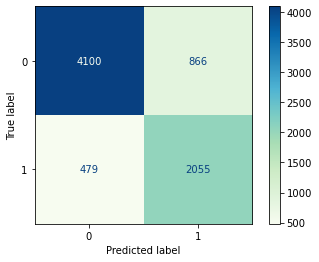

In [221]:
plt.figure(figsize = (10,10))
plot_confusion_matrix(BEST_MODEL_MLP, X_test, y_test, cmap = 'GnBu')  
plt.show()

In [222]:
roc_auc_score(y_test, y_Pred_mlp)

0.8182924867790796

In [223]:
MLP_FP, MLP_TP, MLP_thresh = roc_curve(y_test, y_Pred_mlp)

In [224]:
MLP_AUC = auc(MLP_FP, MLP_TP)

## ROC of SVM and MLP

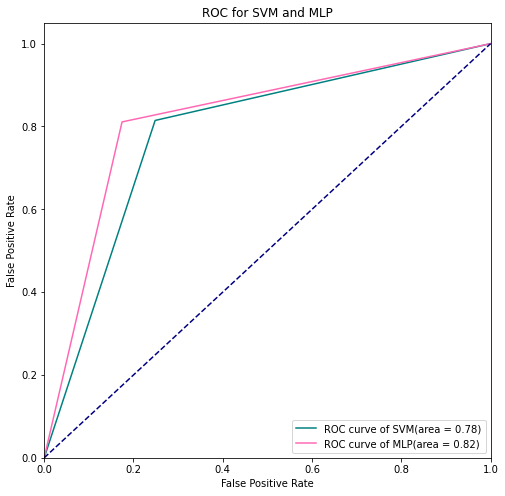

In [225]:
plt.figure(figsize = (8,8))
plt.plot(SVM_FP, SVM_TP, color = "teal", label = "ROC curve of SVM(area = %0.2f)" % SVM_AUC)
plt.plot(MLP_FP, MLP_TP, color = "hotpink", label = "ROC curve of MLP(area = %0.2f)" % MLP_AUC)
plt.plot([0,1], [0,1], color = "navy", linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("ROC for SVM and MLP")
plt.legend(loc = "lower right")
plt.show()

#### FUTURE WORK: To work further on the best model of MLP to overcome overfitting

## *** End***